https://aroussi.com/post/python-yahoo-finance

In [ ]:
# https://aroussi.com/post/python-yahoo-finance
import yfinance as yf
# apple and amazon
data = yf.download("AAPL AMZN", start="2016-10-01", end="2017-04-30",
                   group_by="ticker")
print(data)


/tmp/ipython-input-2466902754.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL AMZN", start="2016-10-01", end="2017-04-30",
[*********************100%***********************]  2 of 2 completed

Ticker           AMZN                                                   AAPL  \
Price            Open       High        Low      Close     Volume       Open   
Date                                                                           
2016-10-03  41.799999  41.993000  41.562500  41.837002   55388000  25.870376   
2016-10-04  42.045502  42.118500  41.513000  41.701500   59006000  25.950709   
2016-10-05  41.900002  42.283501  41.806000  42.217999   69382000  26.028749   
2016-10-06  42.185001  42.360500  42.029999  42.083000   53680000  26.097611   
2016-10-07  42.289501  42.297501  41.872501  41.971500   48524000  26.237621   
...               ...        ...        ...        ...        ...        ...   
2017-04-24  45.433998  45.499500  45.191002  45.370499   62458000  33.250260   
2017-04-25  45.352001  45.473999  45.150002  45.381001   67612000  33.345267   
2017-04-26  45.514999  45.787498  45.377998  45.464500   52178000  33.475010   
2017-04-27  45.719501  46.092999  45.605

In [ ]:
pip install yfinance pandas numpy matplotlib scikit-learn torch

In [ ]:
import yfinance as yf, pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
# https://gist.github.com/yashveersinghsohi/060d1dc1311142f387d1c0ba8267e230
# for dowloading S&P 500
TICKERS = ["AAPL","MSFT","GOOGL","AMZN","META","NVDA","TSLA","SPY", "^GSPC"]
START, END = "2015-01-01", None

data = yf.download(" ".join(TICKERS), start=START, end=END, auto_adjust=True, actions=True)

stacked = (data.stack(level=1)
        .rename_axis(index=["Date","Ticker"])
        .reset_index()
        .sort_values(["Ticker","Date"]))

stacked['Ticker'] = stacked['Ticker'].replace('^GSPC', 'S&P 500')

summary = (stacked
      .assign(Return=lambda d: d.groupby("Ticker")["Close"].pct_change())
      .groupby("Ticker")
      .agg(n_days=("Date","nunique"),
          start=("Date","min"), end=("Date","max"),
          mean_ret=("Return","mean"), vol_ret=("Return","std"),
          ann_vol=("Return", lambda x: x.std()*np.sqrt(252)),
          avg_dollar_vol=("Close", "mean")))

[*********************100%***********************]  9 of 9 completed
/tmp/ipython-input-3914225585.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked = (data.stack(level=1)


In [ ]:
summary

n_days      start        end  mean_ret   vol_ret   ann_vol  \
Ticker                                                                
AAPL       2726 2015-01-02 2025-11-03  0.001050  0.018275  0.290105   
AMZN       2726 2015-01-02 2025-11-03  0.001244  0.020811  0.330367   
GOOGL      2726 2015-01-02 2025-11-03  0.001037  0.018143  0.288016   
META       2726 2015-01-02 2025-11-03  0.001056  0.023743  0.376902   
MSFT       2726 2015-01-02 2025-11-03  0.001084  0.016996  0.269811   
NVDA       2726 2015-01-02 2025-11-03  0.002695  0.030767  0.488407   
S&P 500    2726 2015-01-02 2025-11-03  0.000506  0.011327  0.179805   
SPY        2726 2015-01-02 2025-11-03  0.000572  0.011252  0.178628   
TSLA       2726 2015-01-02 2025-11-03  0.001936  0.036488  0.579227   

         avg_dollar_vol  
Ticker                   
AAPL         103.961244  
AMZN         109.993284  
GOOGL         90.697459  
META         255.933527  
MSFT         202.406322  
NVDA          30.591864  
S&P 500     3567.951368  
SPY          333.943901  
TSLA         132.993679

In [ ]:
print(stacked.columns)

Index(['Date', 'Ticker', 'Capital Gains', 'Close', 'Dividends', 'High', 'Low',
       'Open', 'Stock Splits', 'Volume'],
      dtype='object', name='Price')


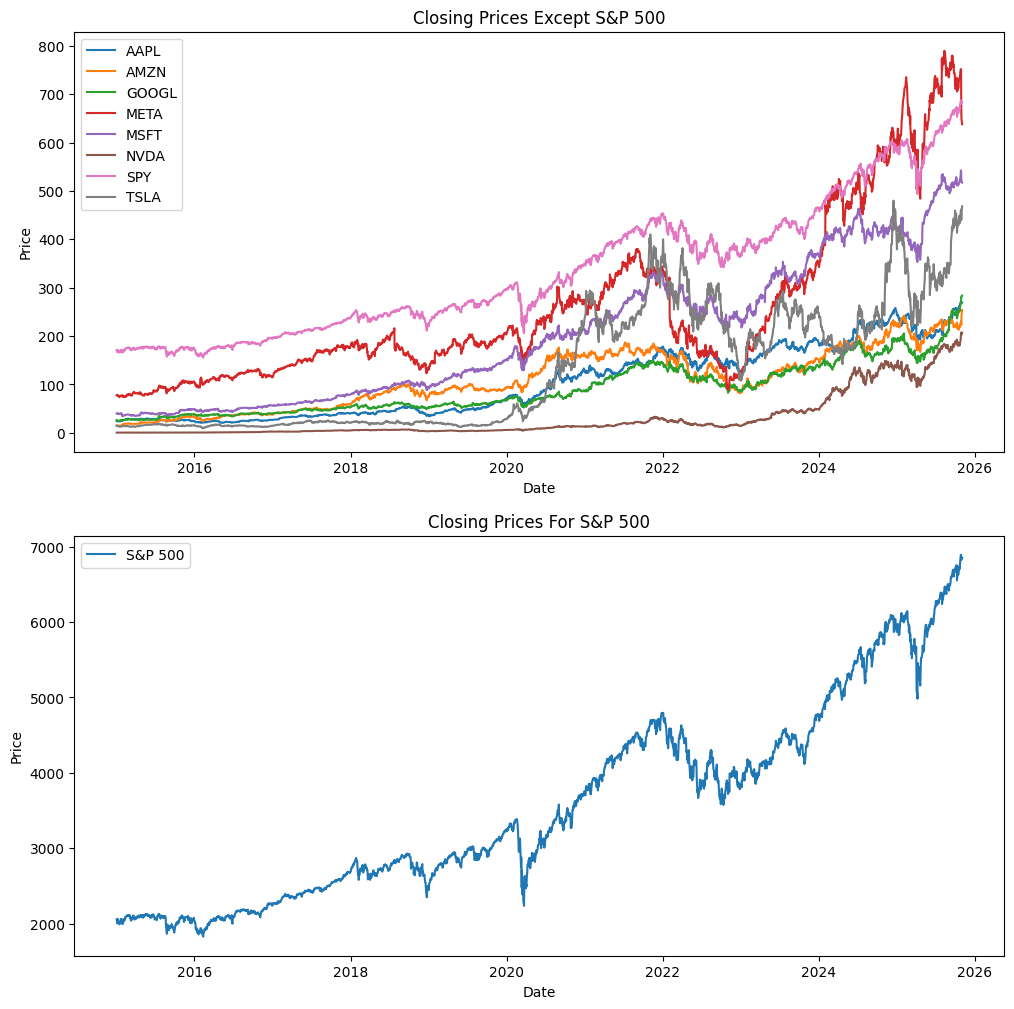

In [ ]:
# import matplotlib.pyplot as plt

# Find the right price column
# price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
# if not price_cols:
#     price_cols = [c for c in stacked.columns if "close" in c.lower()]  # fallback
# price_col = price_cols[0]  # take the first match

# plt.figure(figsize=(12,6))
# for ticker in stacked["Ticker"].unique():
#     subset = stacked[stacked["Ticker"] == ticker]
#     plt.plot(subset["Date"], subset[price_col], label=ticker)

# plt.title("Closing Prices")
# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.legend()
# plt.show()
import matplotlib.pyplot as plt

# Find the right price column
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]  # fallback
price_col = price_cols[0]  # take the first match

fig, axes = plt.subplots(2, 1, figsize=(12, 12))
# plt.figure(figsize=(12,6))
all_tickers = stacked["Ticker"].unique()
all_tickers_no_sp = np.delete(all_tickers, np.where(all_tickers == 'S&P 500'))

for ticker in all_tickers_no_sp:
    subset = stacked[stacked["Ticker"] == ticker]
    axes[0].plot(subset["Date"], subset[price_col], label=ticker)

axes[0].set_title('Closing Prices Except S&P 500')
axes[0].legend()
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Price")

subset = stacked[stacked["Ticker"] == 'S&P 500']
axes[1].plot(subset["Date"], subset[price_col], label='S&P 500')
axes[1].set_title('Closing Prices For S&P 500')
axes[1].legend()
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Price")
# plt.title("Closing Prices")
plt.show();

This plot shows how different companies’ stock prices change over time. Each line is a company, with dates on the bottom and prices on the side. You can quickly see which stocks go up, which ones move together, and which ones are more stable or jumpy. It’s basically a simple way to compare how the stocks have done in the past.

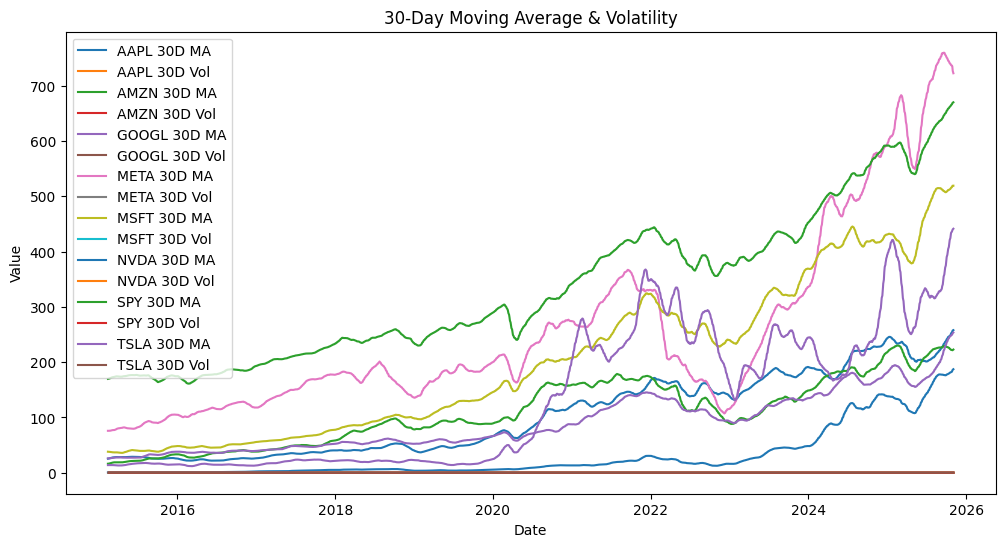

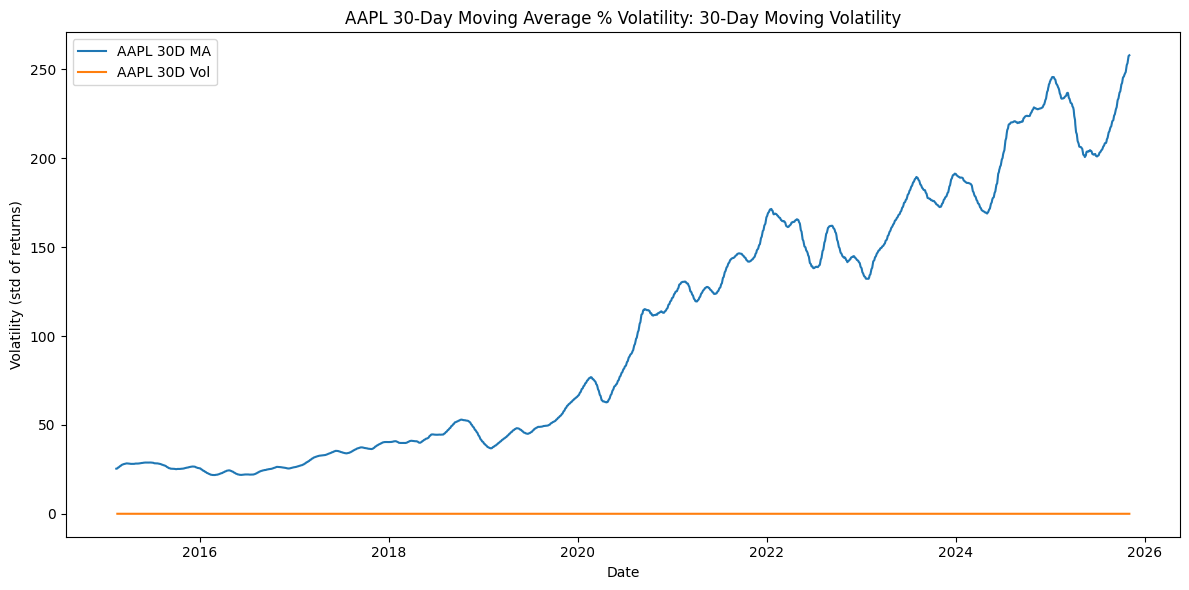

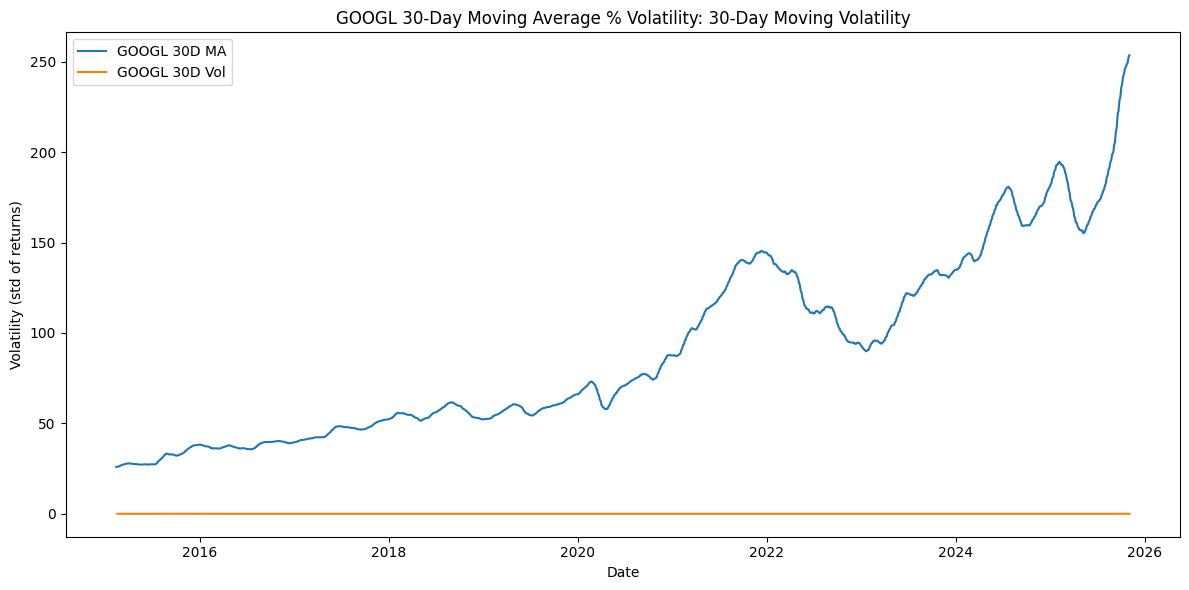

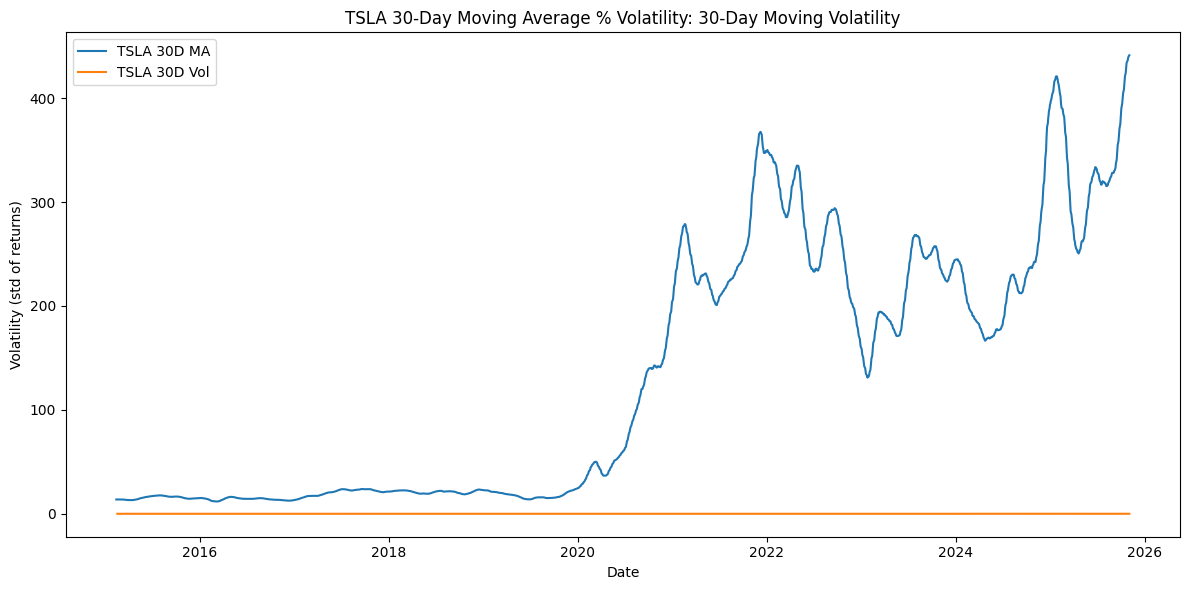

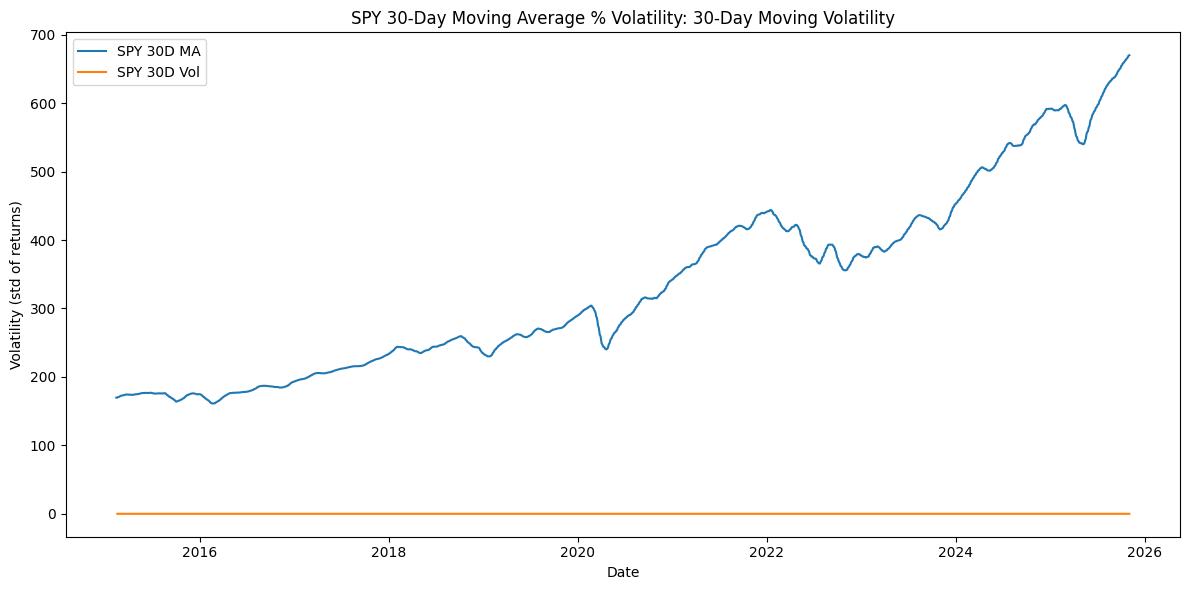

In [ ]:
import matplotlib.pyplot as plt

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in all_tickers_no_sp:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


target = "AAPL 30-Day Moving Average % Volatility"

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

#
subset = stacked[stacked["Ticker"] == "AAPL"].copy()

# Rolling 30-day moving average of price
subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

# Rolling 30-day volatility = std dev of daily returns
subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

# Plot the two series
plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"AAPL {window}D MA")

plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"AAPL {window}D Vol")
#

plt.title(f"{target}: {window}-Day Moving Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (std of returns)")
plt.legend()
plt.tight_layout()
plt.show()








target = "GOOGL 30-Day Moving Average % Volatility"

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

#
subset = stacked[stacked["Ticker"] == "GOOGL"].copy()

# Rolling 30-day moving average of price
subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

# Rolling 30-day volatility = std dev of daily returns
subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

# Plot the two series
plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"GOOGL {window}D MA")

plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"GOOGL {window}D Vol")
#

plt.title(f"{target}: {window}-Day Moving Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (std of returns)")
plt.legend()
plt.tight_layout()
plt.show()







target = "TSLA 30-Day Moving Average % Volatility"

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

#
subset = stacked[stacked["Ticker"] == "TSLA"].copy()

# Rolling 30-day moving average of price
subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

# Rolling 30-day volatility = std dev of daily returns
subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

# Plot the two series
plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"TSLA {window}D MA")

plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"TSLA {window}D Vol")
#

plt.title(f"{target}: {window}-Day Moving Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (std of returns)")
plt.legend()
plt.tight_layout()
plt.show()






target = "SPY 30-Day Moving Average % Volatility"

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

#
subset = stacked[stacked["Ticker"] == "SPY"].copy()

# Rolling 30-day moving average of price
subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

# Rolling 30-day volatility = std dev of daily returns
subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

# Plot the two series
plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"SPY {window}D MA")

plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"SPY {window}D Vol")
#

plt.title(f"{target}: {window}-Day Moving Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (std of returns)")
plt.legend()
plt.tight_layout()
plt.show()

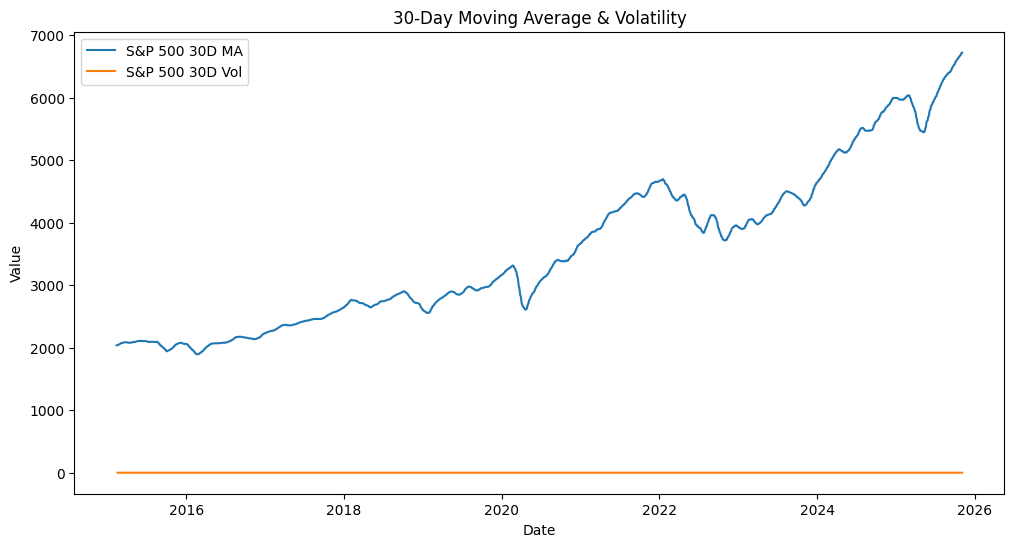

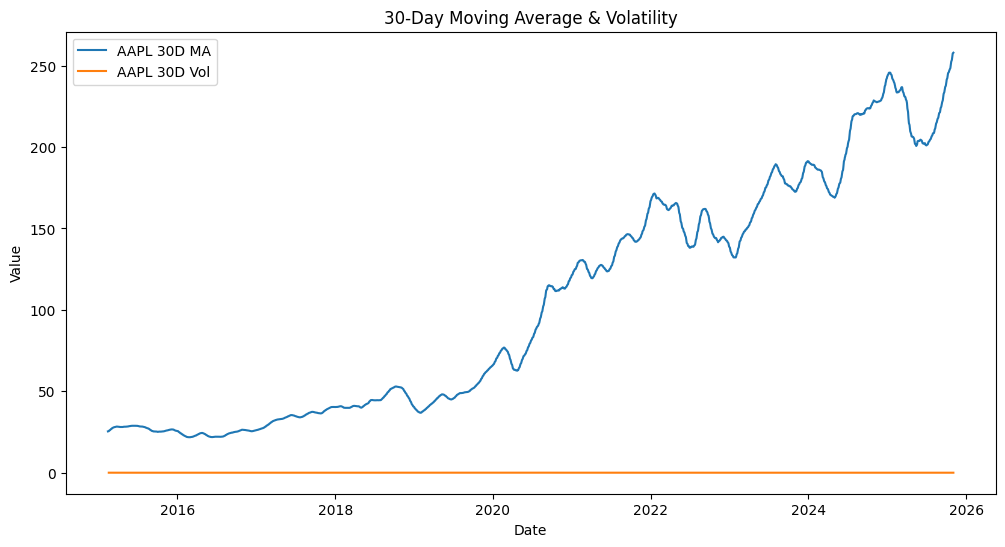

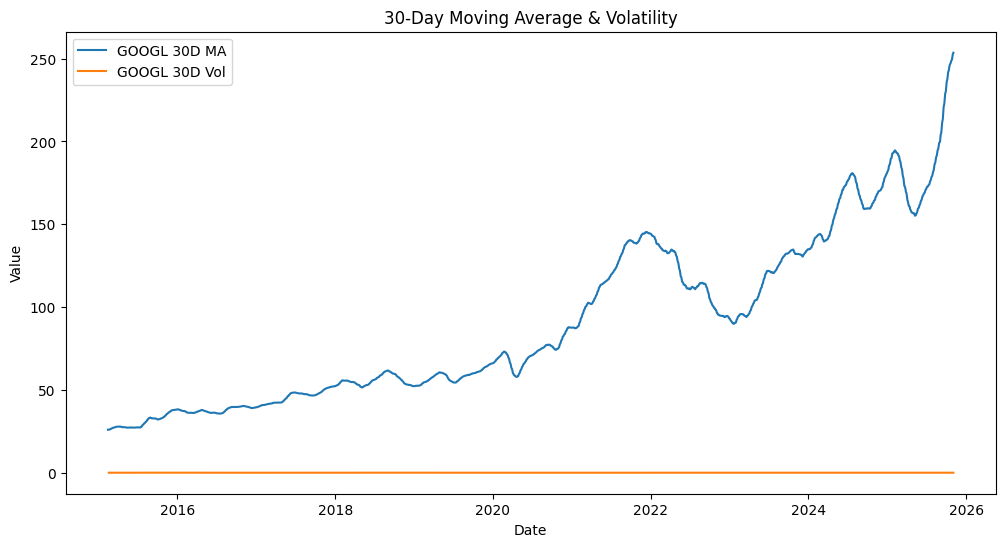

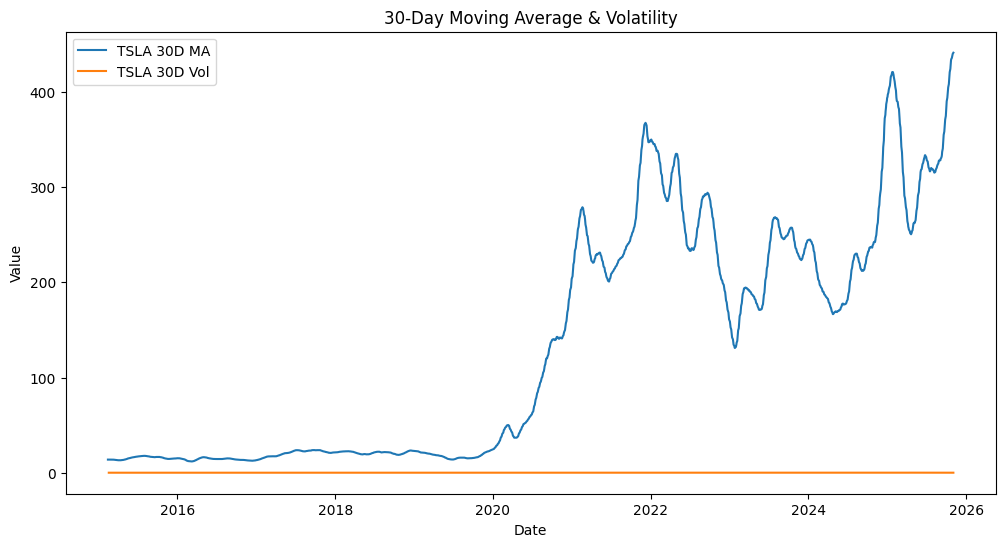

In [ ]:
import matplotlib.pyplot as plt

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in ['S&P 500']:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in ['AAPL']:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()








# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in ['GOOGL']:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()








# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in ['TSLA']:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

this plot shows the moving average of price over 30 days, so we can see the trends without all the daily ups and downs


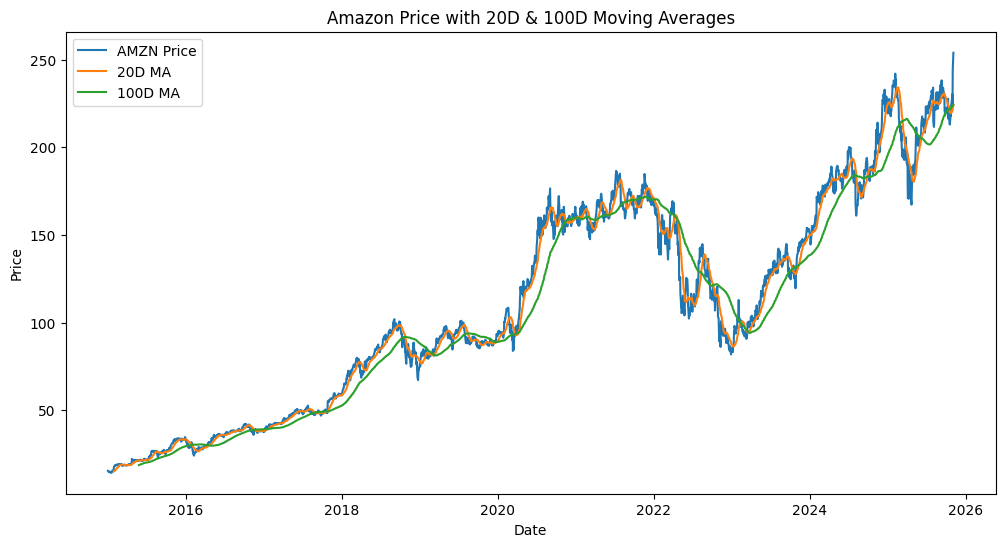

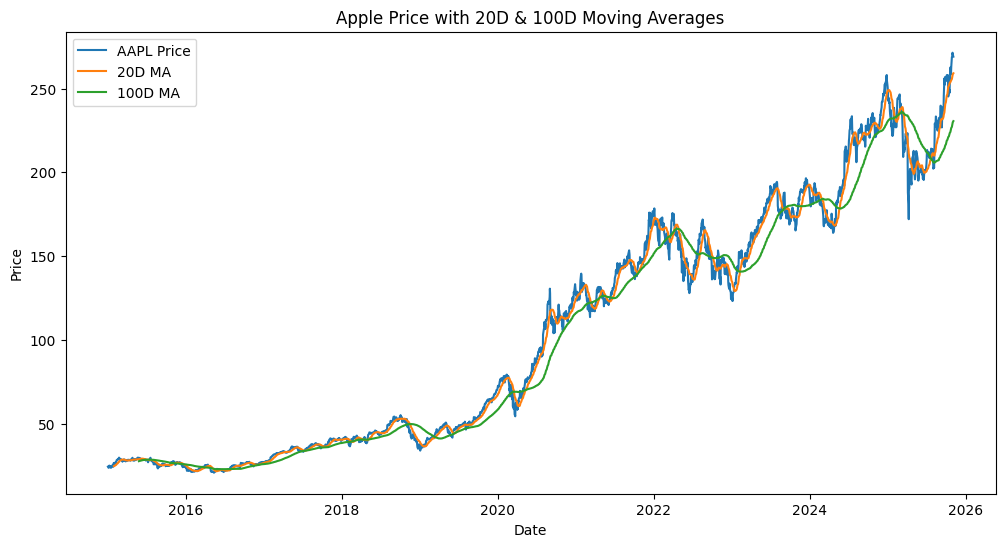

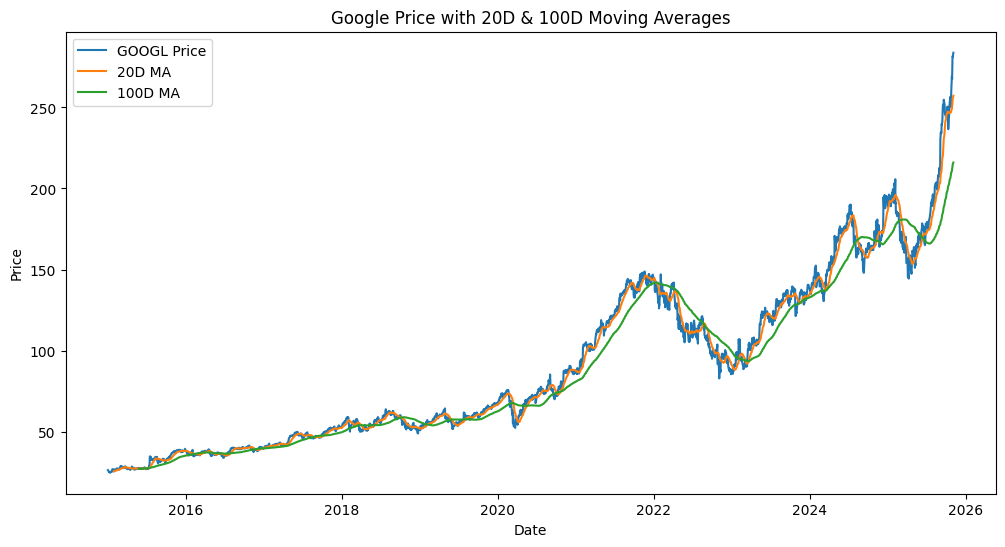

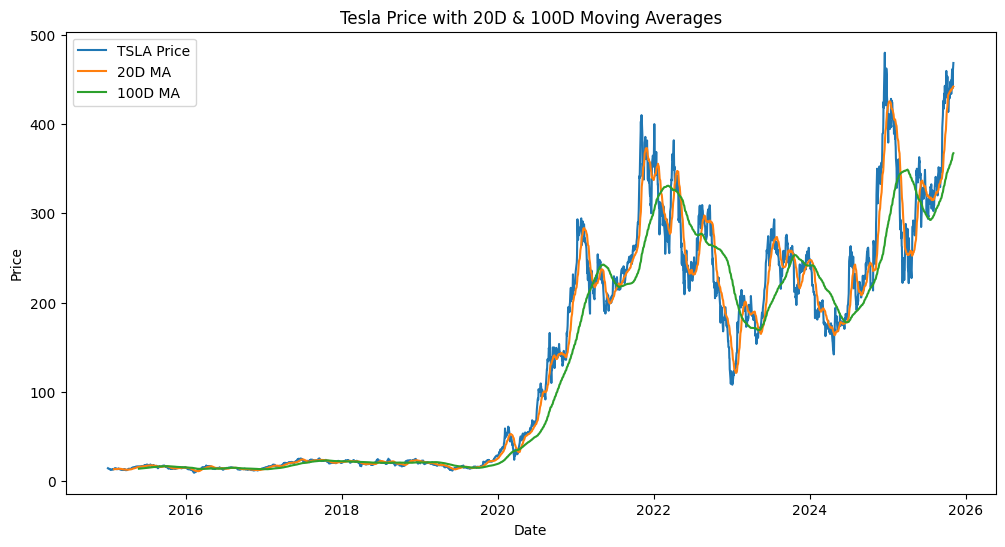

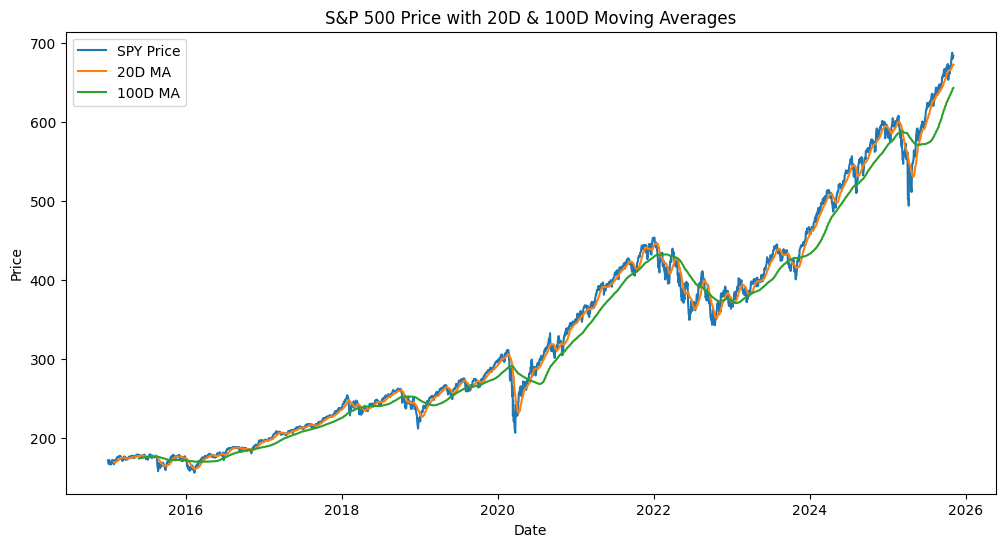

In [ ]:
# price and moving averages for Amazon
amzn = stacked[stacked["Ticker"] == "AMZN"].copy()
amzn["MA20"] = amzn["Close"].rolling(20).mean()
amzn["MA100"] = amzn["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(amzn["Date"], amzn["Close"], label="AMZN Price")
plt.plot(amzn["Date"], amzn["MA20"], label="20D MA")
plt.plot(amzn["Date"], amzn["MA100"], label="100D MA")
plt.title("Amazon Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


aapl = stacked[stacked["Ticker"] == "AAPL"].copy()
aapl["MA20"] = aapl["Close"].rolling(20).mean()
aapl["MA100"] = aapl["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(aapl["Date"], aapl["Close"], label="AAPL Price")
plt.plot(aapl["Date"], aapl["MA20"], label="20D MA")
plt.plot(aapl["Date"], aapl["MA100"], label="100D MA")
plt.title("Apple Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()



googl = stacked[stacked["Ticker"] == "GOOGL"].copy()
googl["MA20"] = googl["Close"].rolling(20).mean()
googl["MA100"] = googl["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(googl["Date"], googl["Close"], label="GOOGL Price")
plt.plot(googl["Date"], googl["MA20"], label="20D MA")
plt.plot(googl["Date"], googl["MA100"], label="100D MA")
plt.title("Google Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


tsla = stacked[stacked["Ticker"] == "TSLA"].copy()
tsla["MA20"] = tsla["Close"].rolling(20).mean()
tsla["MA100"] = tsla["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(tsla["Date"], tsla["Close"], label="TSLA Price")
plt.plot(tsla["Date"], tsla["MA20"], label="20D MA")
plt.plot(tsla["Date"], tsla["MA100"], label="100D MA")
plt.title("Tesla Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


spy = stacked[stacked["Ticker"] == "SPY"].copy()
spy["MA20"] = spy["Close"].rolling(20).mean()
spy["MA100"] = spy["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(spy["Date"], spy["Close"], label="SPY Price")
plt.plot(spy["Date"], spy["MA20"], label="20D MA")
plt.plot(spy["Date"], spy["MA100"], label="100D MA")
plt.title("S&P 500 Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

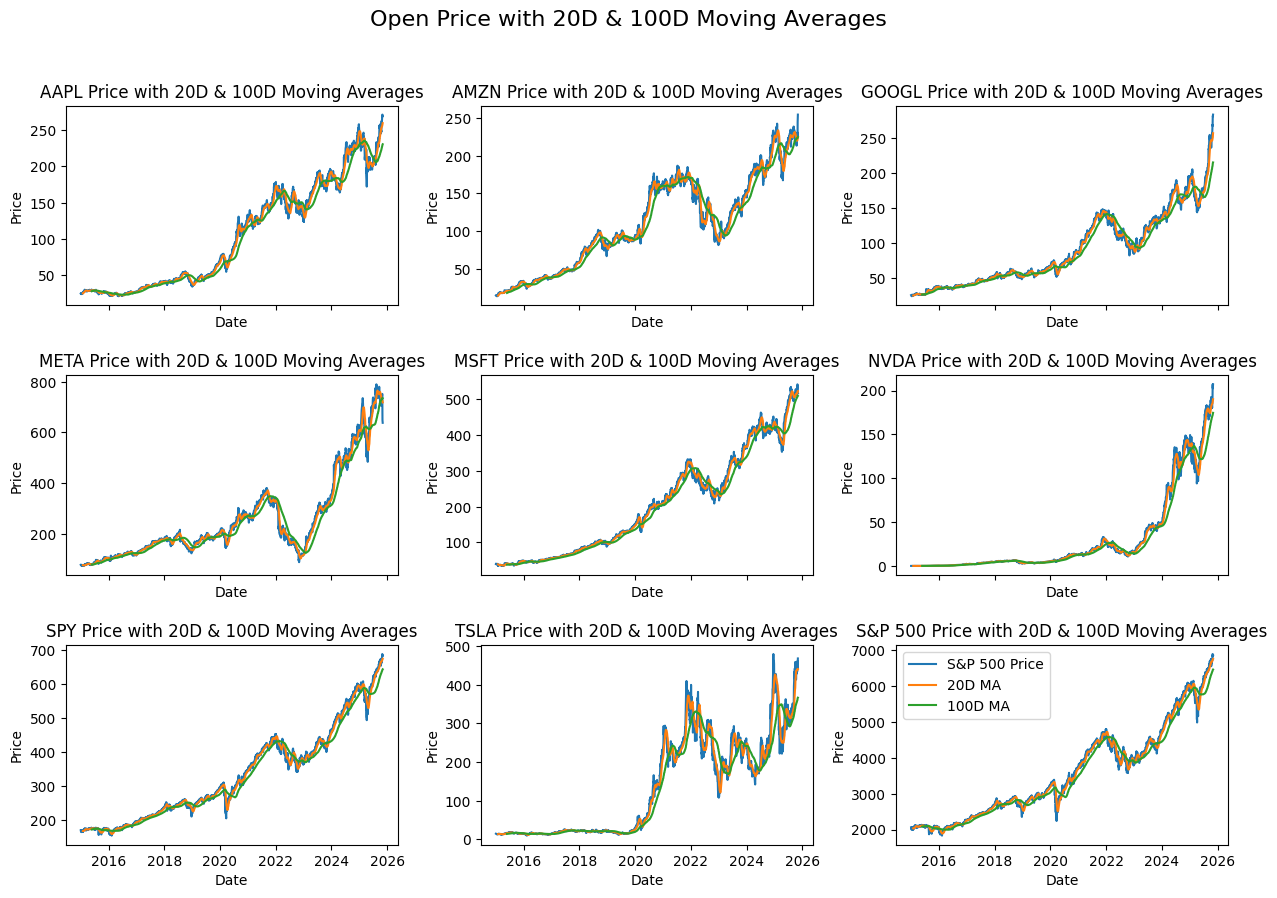

In [ ]:
import math
tickers = stacked["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
  ax = axes[i]
  temp = stacked[stacked["Ticker"] == t].copy()
  temp["MA20"] = temp["Open"].rolling(20).mean()
  temp["MA100"] = temp["Open"].rolling(100).mean()
  ax.plot(temp["Date"], temp["Close"], label= f"{t} Price")
  ax.plot(temp["Date"], temp["MA20"], label="20D MA")
  ax.plot(temp["Date"], temp["MA100"], label="100D MA")
  ax.set_title(f"{t} Price with 20D & 100D Moving Averages")
  ax.set_xlabel("Date")
  ax.set_ylabel("Price")

fig.suptitle("Open Price with 20D & 100D Moving Averages", fontsize=16, y=0.98)
plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.legend()
plt.show()

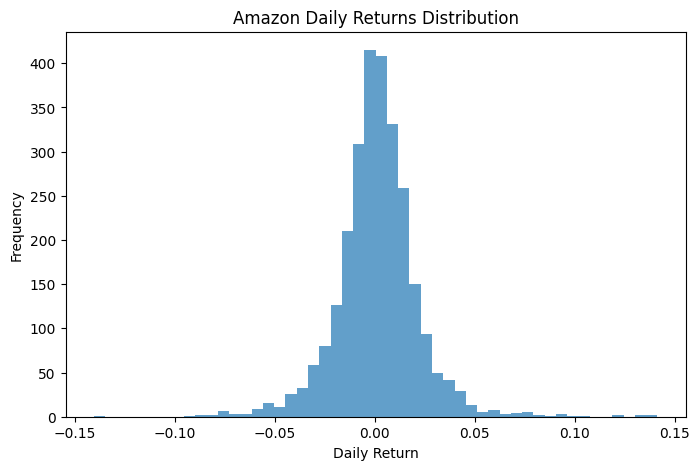

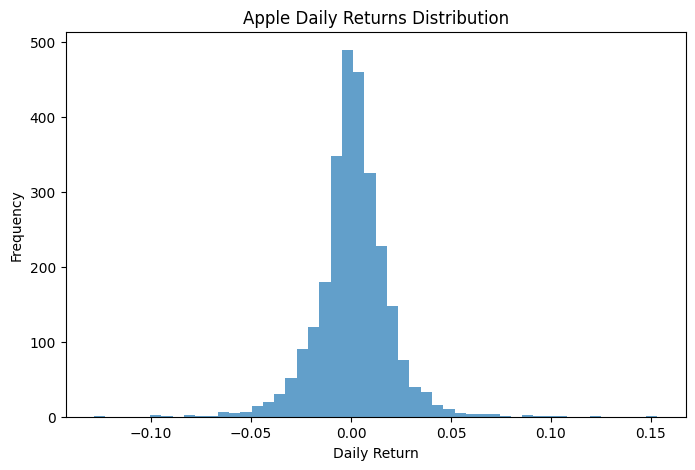

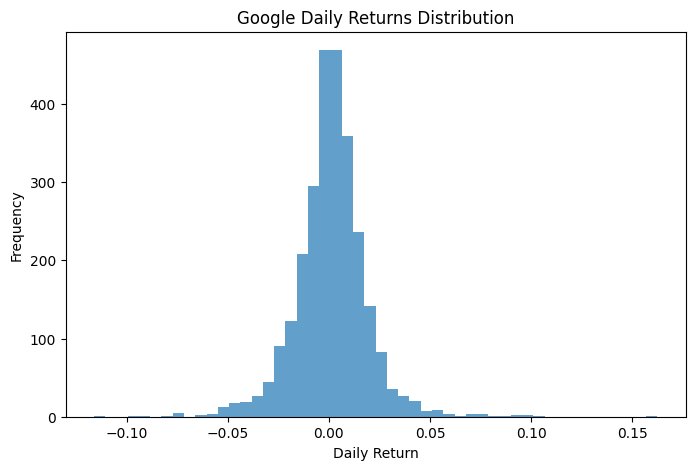

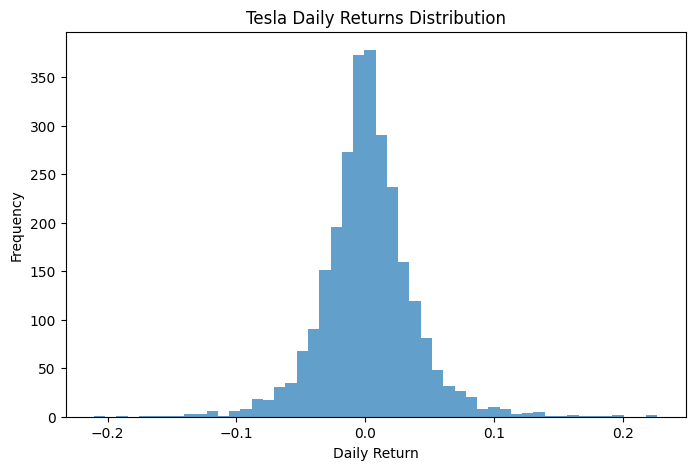

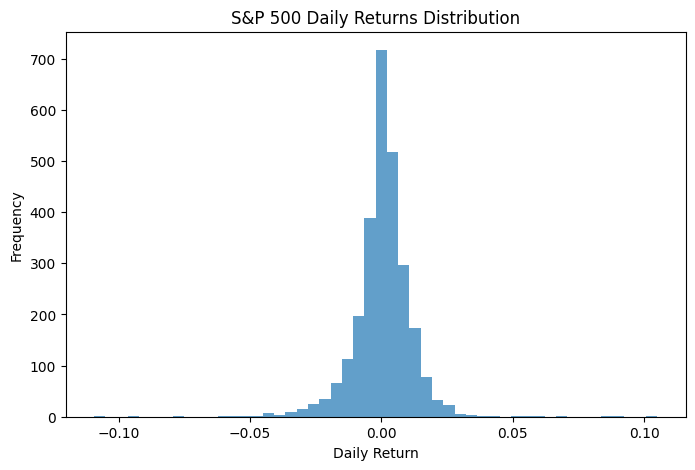

In [ ]:
#Daily Returns Distribution
amzn["Return"] = amzn["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(amzn["Return"].dropna(), bins=50, alpha=0.7)
plt.title("Amazon Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


aapl["Return"] = aapl["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(aapl["Return"].dropna(), bins=50, alpha=0.7)
plt.title("Apple Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()



#Daily Returns Distribution
googl["Return"] = googl["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(googl["Return"].dropna(), bins=50, alpha=0.7)
plt.title("Google Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()



#Daily Returns Distribution
tsla["Return"] = tsla["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(tsla["Return"].dropna(), bins=50, alpha=0.7)
plt.title("Tesla Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()



#Daily Returns Distribution
spy["Return"] = spy["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(spy["Return"].dropna(), bins=50, alpha=0.7)
plt.title("S&P 500 Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-357590628.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


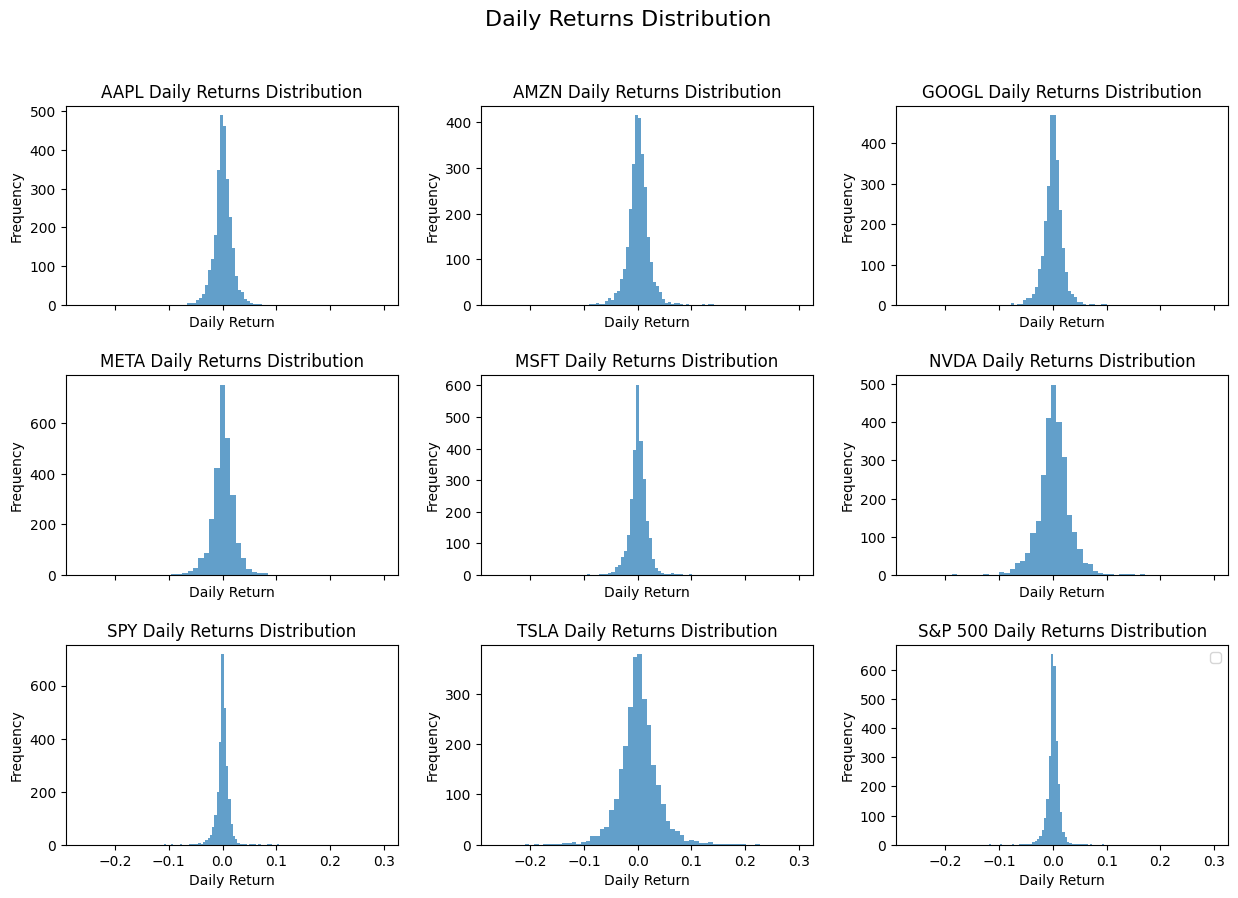

In [ ]:
import math

#Daily Returns Distribution
tickers = stacked["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
  ax = axes[i]
  temp = stacked[stacked["Ticker"] == t].copy()
  temp["Return"] = temp["Close"].pct_change()
  ax.hist(temp["Return"].dropna(), bins=50, alpha=0.7)
  ax.set_title(f"{t} Daily Returns Distribution")
  ax.set_xlabel("Daily Return")
  ax.set_ylabel("Frequency")

fig.suptitle("Daily Returns Distribution", fontsize=16, y=0.98)
plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.legend()
plt.show();

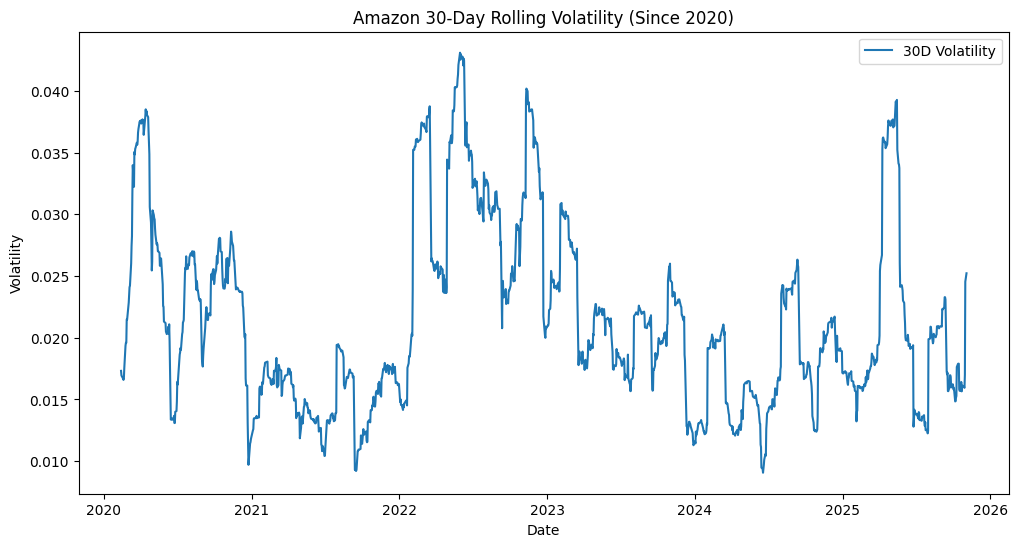

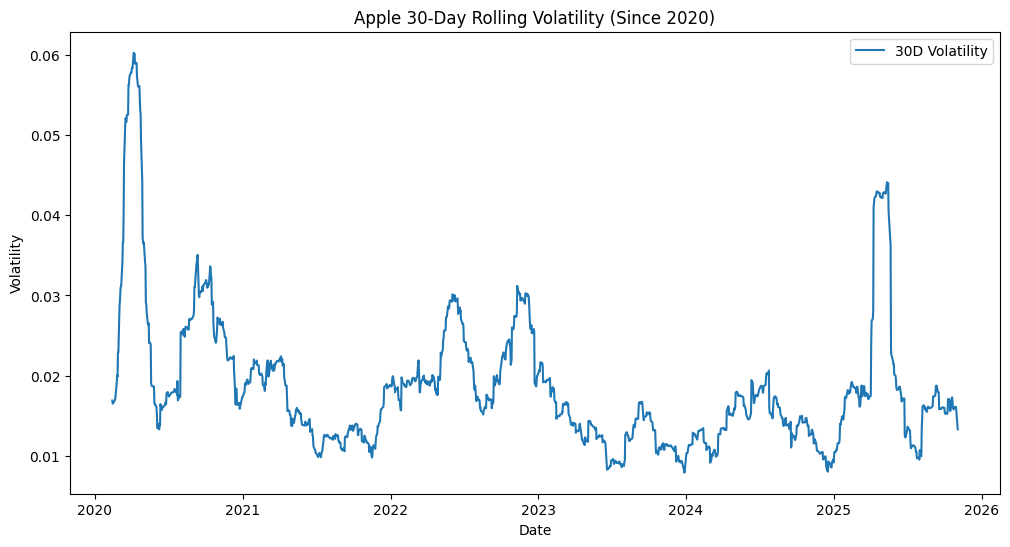

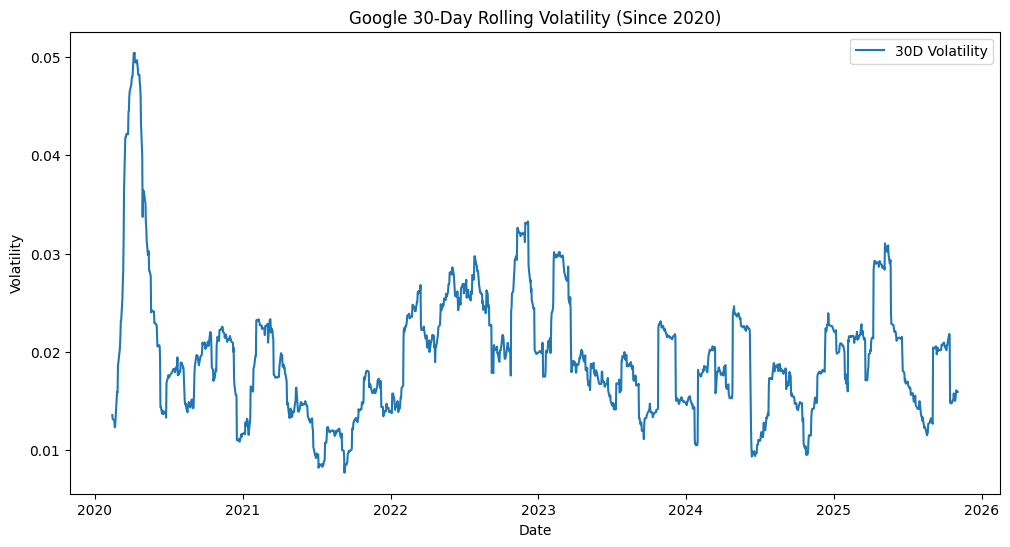

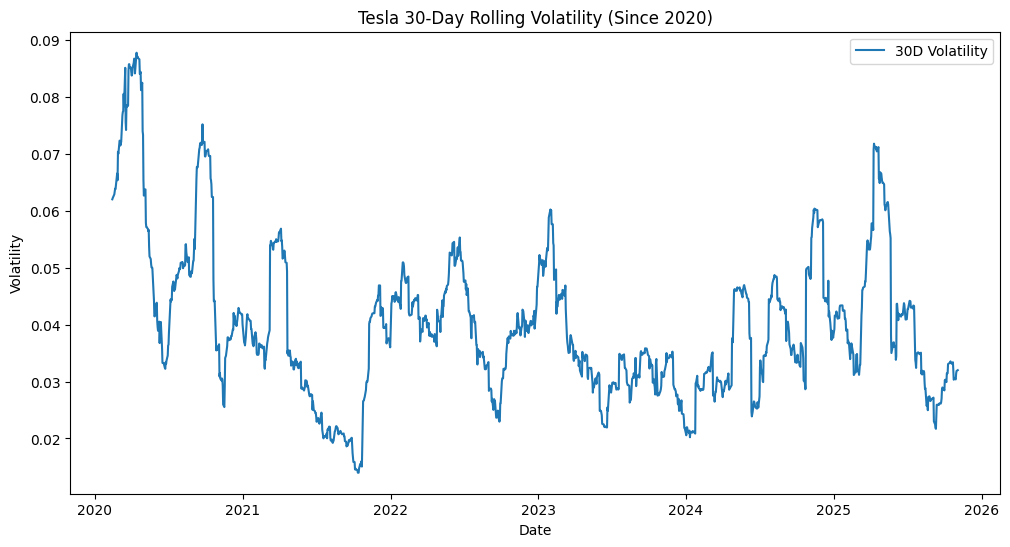

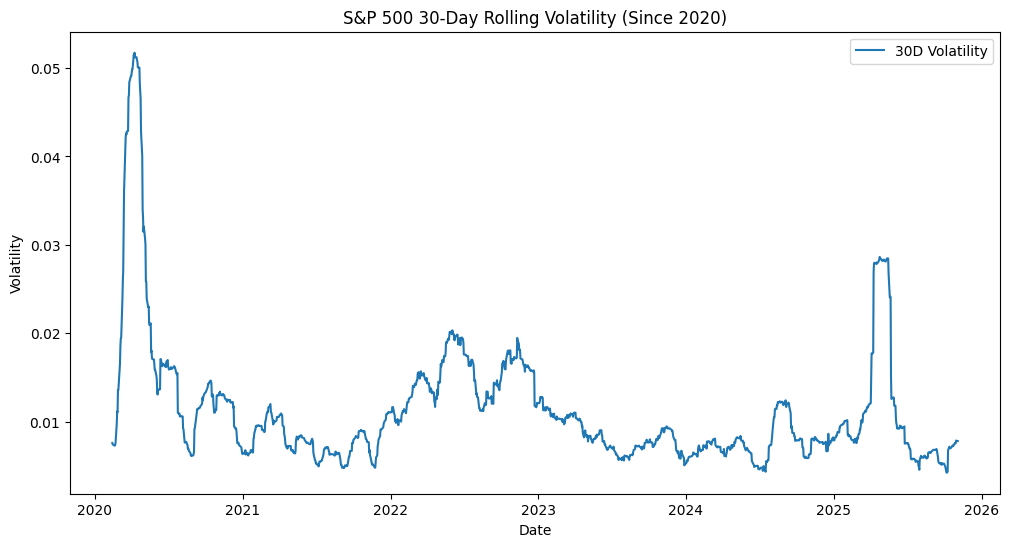

In [ ]:
#Rolling Volatility (since 2020)
amzn_recent = amzn[amzn["Date"] >= "2020-01-01"].copy()
amzn_recent["RollingVol30"] = amzn_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(amzn_recent["Date"], amzn_recent["RollingVol30"], label="30D Volatility")
plt.title("Amazon 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


aapl_recent = aapl[aapl["Date"] >= "2020-01-01"].copy()
aapl_recent["RollingVol30"] = aapl_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(aapl_recent["Date"], aapl_recent["RollingVol30"], label="30D Volatility")
plt.title("Apple 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()



googl_recent = googl[googl["Date"] >= "2020-01-01"].copy()
googl_recent["RollingVol30"] = googl_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(googl_recent["Date"], googl_recent["RollingVol30"], label="30D Volatility")
plt.title("Google 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()



tsla_recent = tsla[tsla["Date"] >= "2020-01-01"].copy()
tsla_recent["RollingVol30"] = tsla_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(tsla_recent["Date"], tsla_recent["RollingVol30"], label="30D Volatility")
plt.title("Tesla 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


spy_recent = spy[spy["Date"] >= "2020-01-01"].copy()
spy_recent["RollingVol30"] = spy_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(spy_recent["Date"], spy_recent["RollingVol30"], label="30D Volatility")
plt.title("S&P 500 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

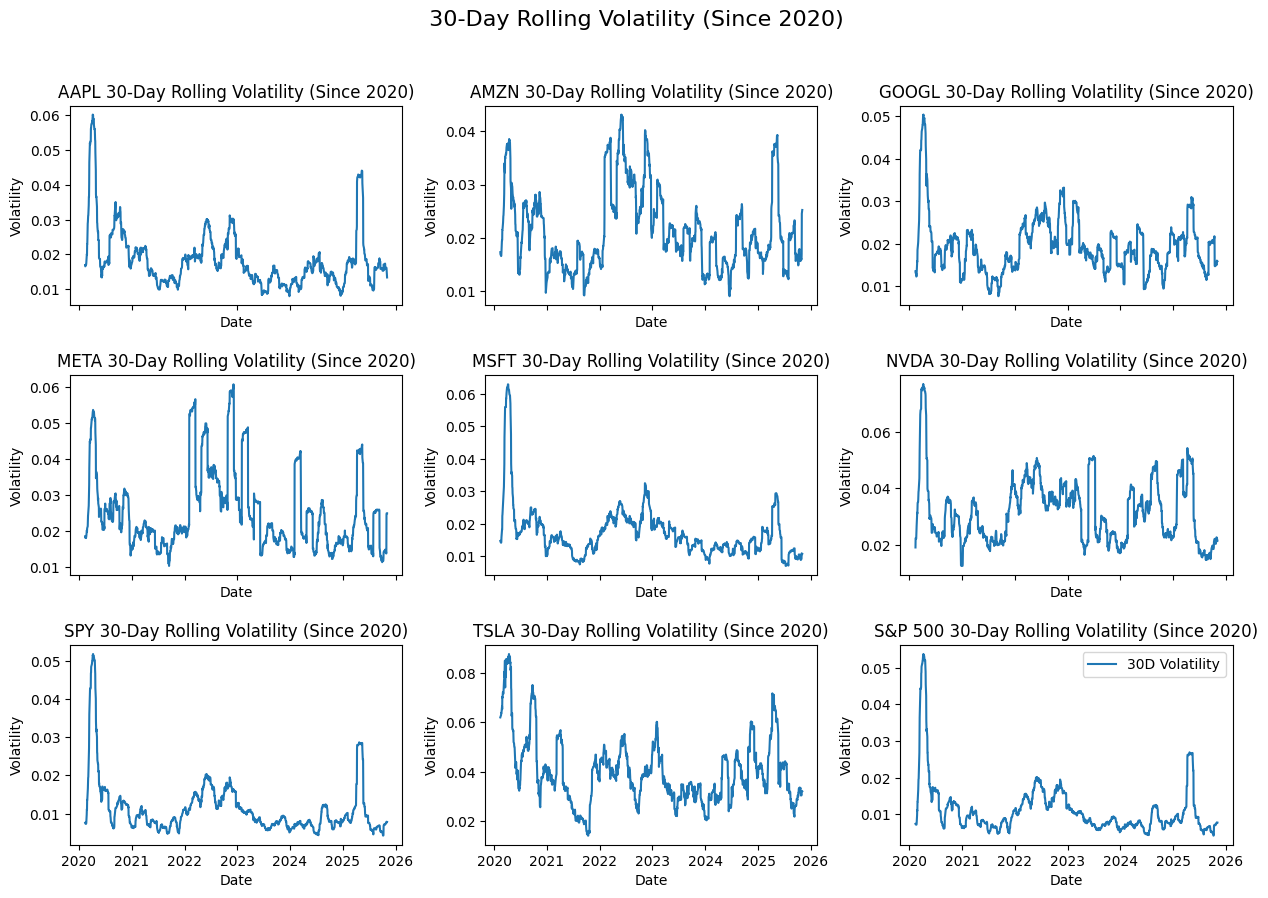

In [ ]:
#Rolling Volatility (since 2020)
tickers = stacked["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
  ax = axes[i]
  temp = stacked[stacked["Ticker"] == t].copy()
  temp["Return"] = temp["Close"].pct_change()
  temp_recent = temp[temp['Date'] >= "2020-01-01"].copy()
  temp_recent["RollingVol30"] = temp_recent["Return"].rolling(30).std()
  ax.plot(temp_recent["Date"], temp_recent["RollingVol30"], label="30D Volatility")
  ax.set_title(f"{t} 30-Day Rolling Volatility (Since 2020)")
  ax.set_xlabel("Date")
  ax.set_ylabel("Volatility")

fig.suptitle(" 30-Day Rolling Volatility (Since 2020)", fontsize=16, y=0.98)
plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.legend()
plt.show();

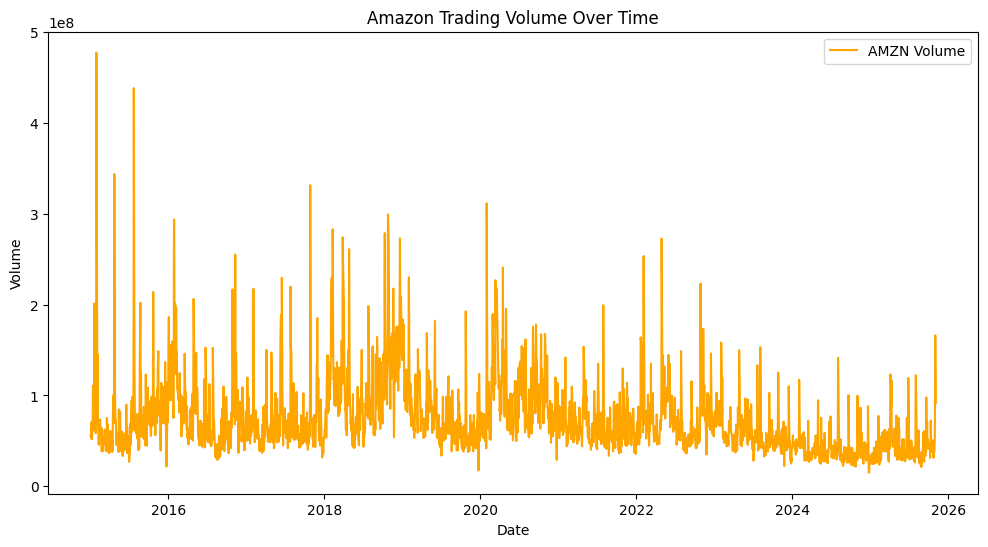

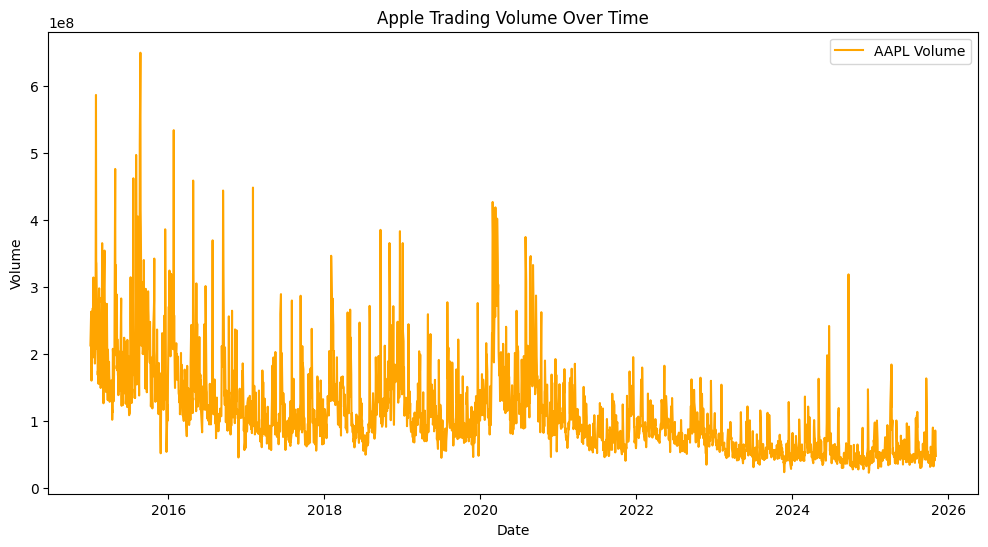

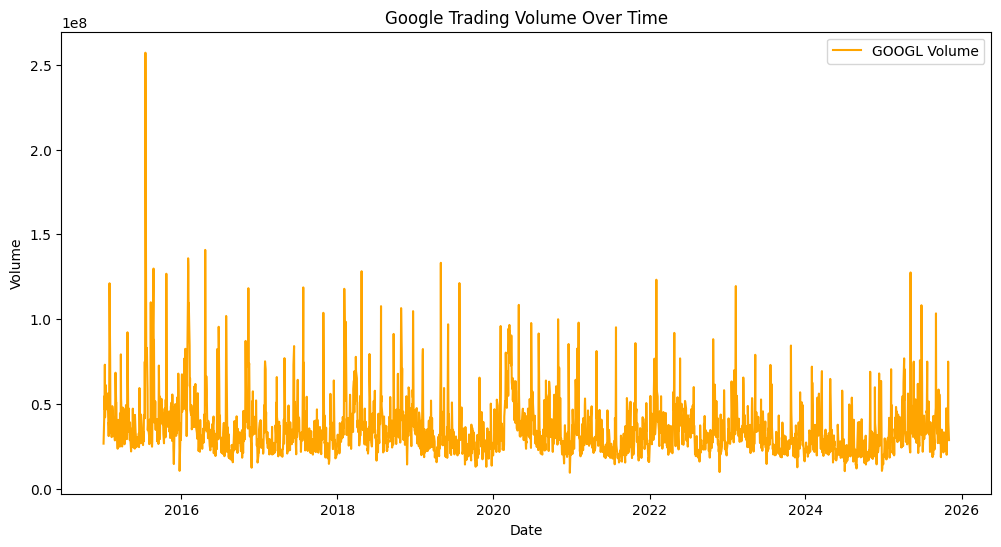

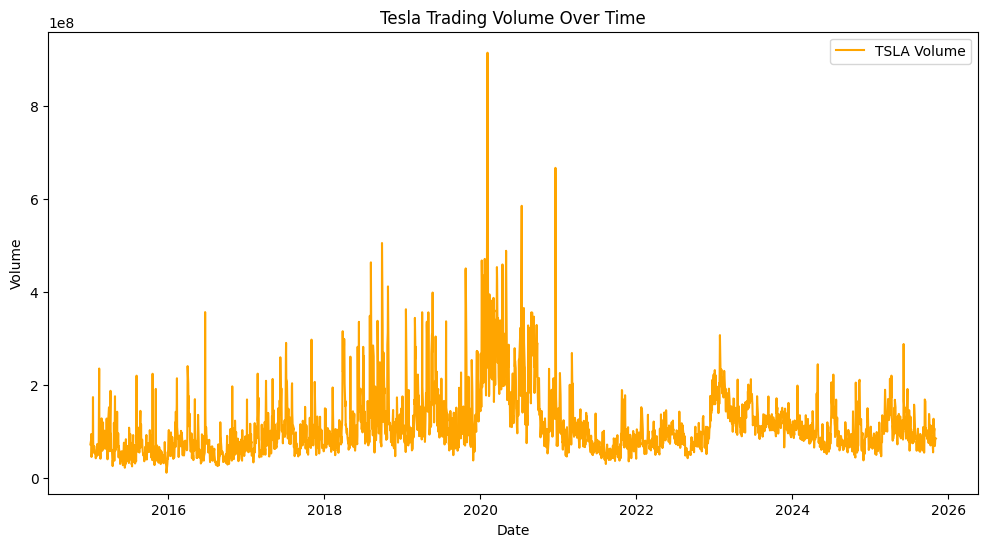

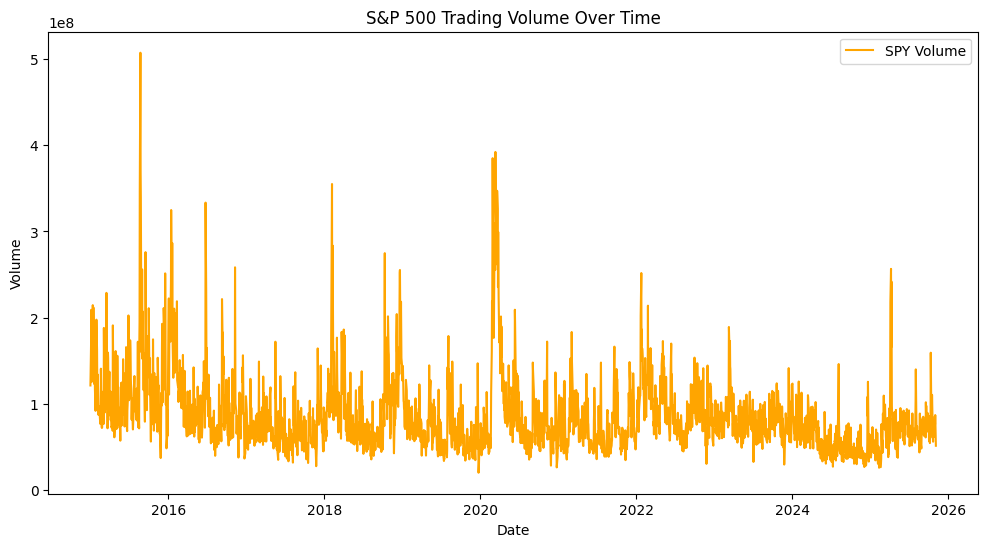

In [ ]:
#Trading Volume
plt.figure(figsize=(12,6))
plt.plot(amzn["Date"], amzn["Volume"], label="AMZN Volume", color="orange")
plt.title("Amazon Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()


plt.figure(figsize=(12,6))
plt.plot(aapl["Date"], aapl["Volume"], label="AAPL Volume", color="orange")
plt.title("Apple Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()




#Trading Volume
plt.figure(figsize=(12,6))
plt.plot(googl["Date"], googl["Volume"], label="GOOGL Volume", color="orange")
plt.title("Google Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()




#Trading Volume
plt.figure(figsize=(12,6))
plt.plot(tsla["Date"], tsla["Volume"], label="TSLA Volume", color="orange")
plt.title("Tesla Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()




#Trading Volume
plt.figure(figsize=(12,6))
plt.plot(spy["Date"], spy["Volume"], label="SPY Volume", color="orange")
plt.title("S&P 500 Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

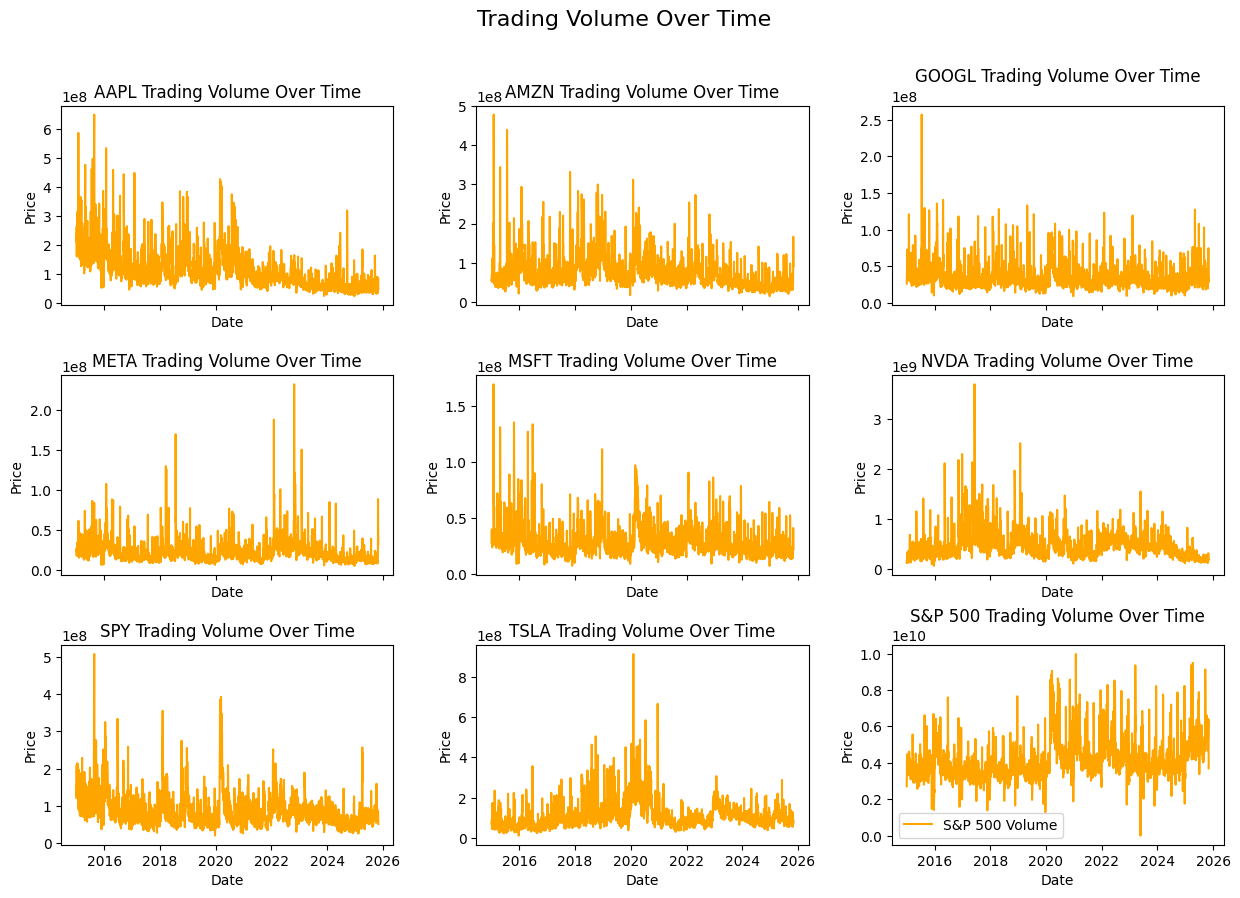

In [ ]:
#Trading Volume
tickers = stacked["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
  ax = axes[i]
  temp = stacked[stacked["Ticker"] == t].copy()
  ax.plot(temp["Date"], temp["Volume"], label=f"{t} Volume", color="orange")
  ax.set_title(f"{t} Trading Volume Over Time")
  ax.set_xlabel("Date")
  ax.set_ylabel("Price")

fig.suptitle("Trading Volume Over Time", fontsize=16, y=0.98)
plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.legend()
plt.show()

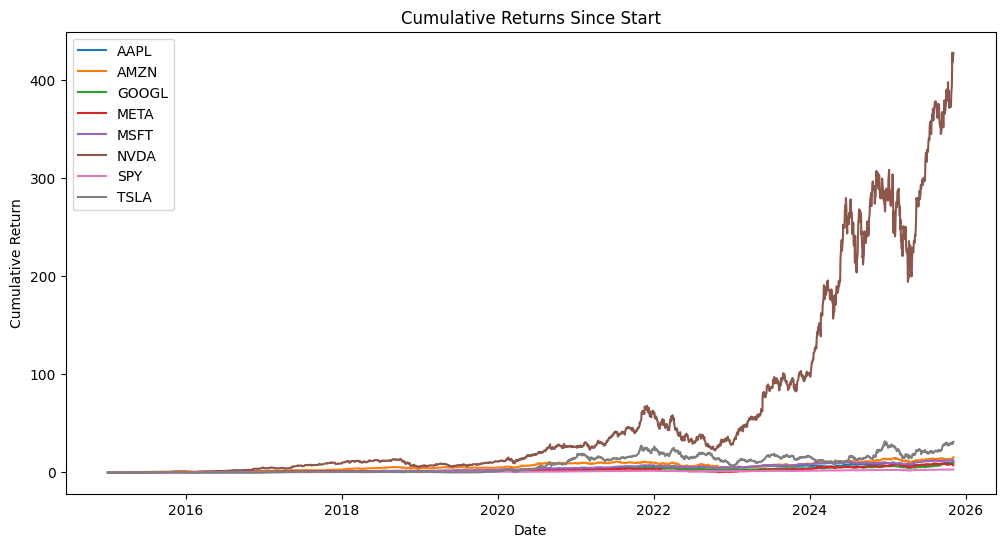

In [ ]:
plt.figure(figsize=(12,6))
for t in all_tickers_no_sp:
    sub = stacked[stacked["Ticker"] == t].sort_values("Date").copy()
    sub["Return"] = sub["Close"].pct_change()
    sub["CumRet"] = (1 + sub["Return"].fillna(0)).cumprod() - 1
    plt.plot(sub["Date"], sub["CumRet"], label=t)

plt.title("Cumulative Returns Since Start")
plt.xlabel("Date"); plt.ylabel("Cumulative Return")
plt.legend(); plt.show()

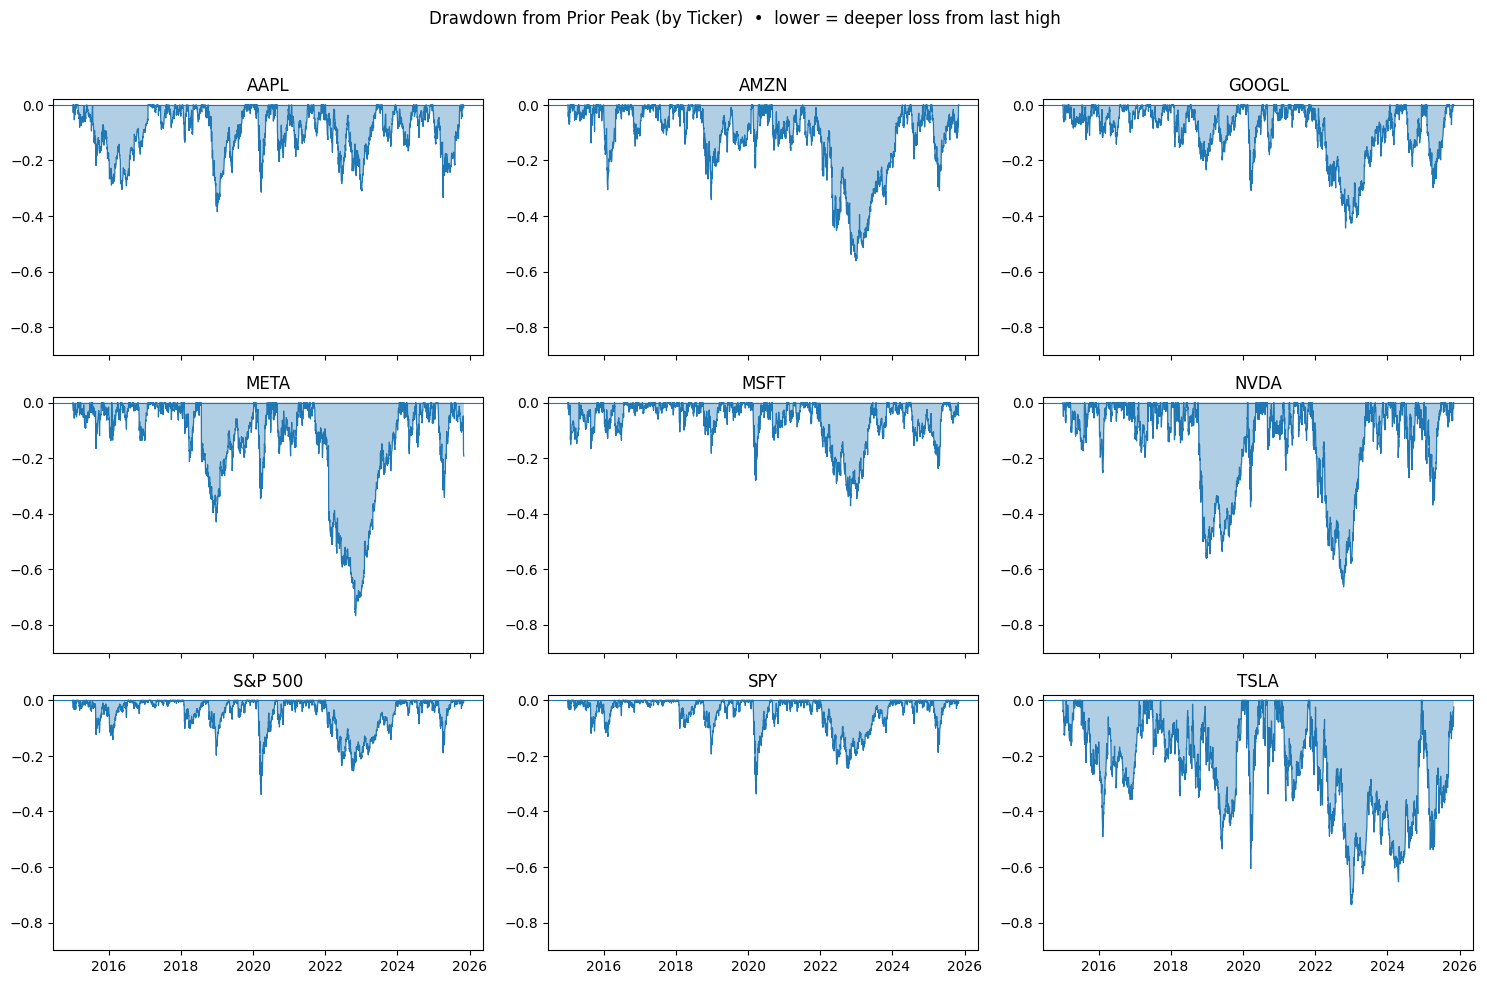

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd

# --- Setup: ensure datetime + find price column ---
stacked["Date"] = pd.to_datetime(stacked["Date"])
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Compute drawdown per ticker ---
df = stacked.sort_values(["Ticker", "Date"]).copy()
df["CumMax"] = df.groupby("Ticker")[price_col].cummax()
df["Drawdown"] = df[price_col] / df["CumMax"] - 1  # (price / peak) - 1  → 0 at peaks, negative when below
""
# --- Small multiples: one subplot per ticker ---
tickers = df["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
    ax = axes[i]
    sub = df[df["Ticker"] == t].sort_values("Date").copy()
    sub = sub.dropna(subset=["Drawdown"])
    # area + line so dips are obvious
    ax.fill_between(sub["Date"], sub["Drawdown"], 0, step="pre", alpha=0.35)
    ax.plot(sub["Date"], sub["Drawdown"], linewidth=0.9)
    ax.axhline(0, linewidth=0.8)
    ax.set_title(t)
    ax.set_ylim(min(-0.9, sub["Drawdown"].min()), 0.02)  # cap top slightly above 0

# Hide any empty axes
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Drawdown from Prior Peak (by Ticker)  •  lower = deeper loss from last high", y=1.02)
plt.tight_layout()
plt.show()


drawdown plot shows when each stock was furthest below its recent peak so we can line those dips up with specific headlines.This helps us see if lots of news or bad headlines line up with bigger drops and slower recoveries or even happen right before them.

In [ ]:
!pip -q install kagglehub

import os, shutil, kagglehub

src_path = kagglehub.dataset_download("notlucasp/financial-news-headlines")
print("KaggleHub cached at:", src_path)

dst_dir = "/content/news_data"
shutil.copytree(src_path, dst_dir, dirs_exist_ok=True)


100%|██████████| 3.91M/3.91M [00:00<00:00, 63.5MB/s]

Extracting files...
KaggleHub cached at: /root/.cache/kagglehub/datasets/notlucasp/financial-news-headlines/versions/2


'/content/news_data'

In [ ]:
# Recreate `stacked` if it's missing
import pandas as pd, yfinance as yf

# Use your tickers; edit if needed
TICKERS = ["AAPL","MSFT","GOOGL","AMZN","META","NVDA","TSLA","SPY"]
START, END = "2015-01-01", None

if "stacked" not in globals():
    # Reuse existing yfinance output if present; otherwise download
    if "data" not in globals():
        data = yf.download(" ".join(TICKERS), start=START, end=END,
                           auto_adjust=False, actions=False, progress=False)

    # Convert yfinance wide (MultiIndex columns) -> long format with Date/Ticker columns
    if isinstance(data.columns, pd.MultiIndex):
        stacked = (
            data.stack(level=-1)
                .rename_axis(index=["Date","Ticker"])
                .reset_index()
                .sort_values(["Ticker","Date"])
        )
    else:

        df = data.reset_index().copy()
        df["Ticker"] = TICKERS[0]
        stacked = df.sort_values(["Ticker","Date"])



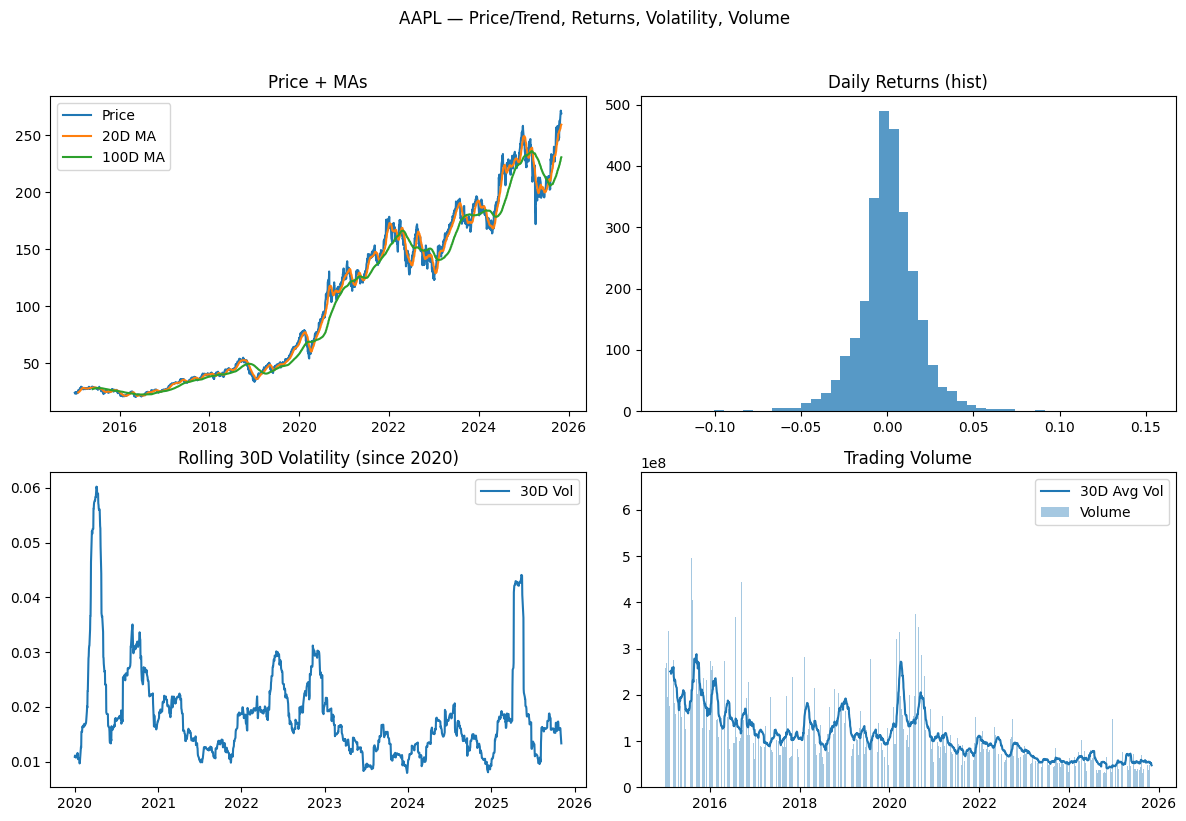

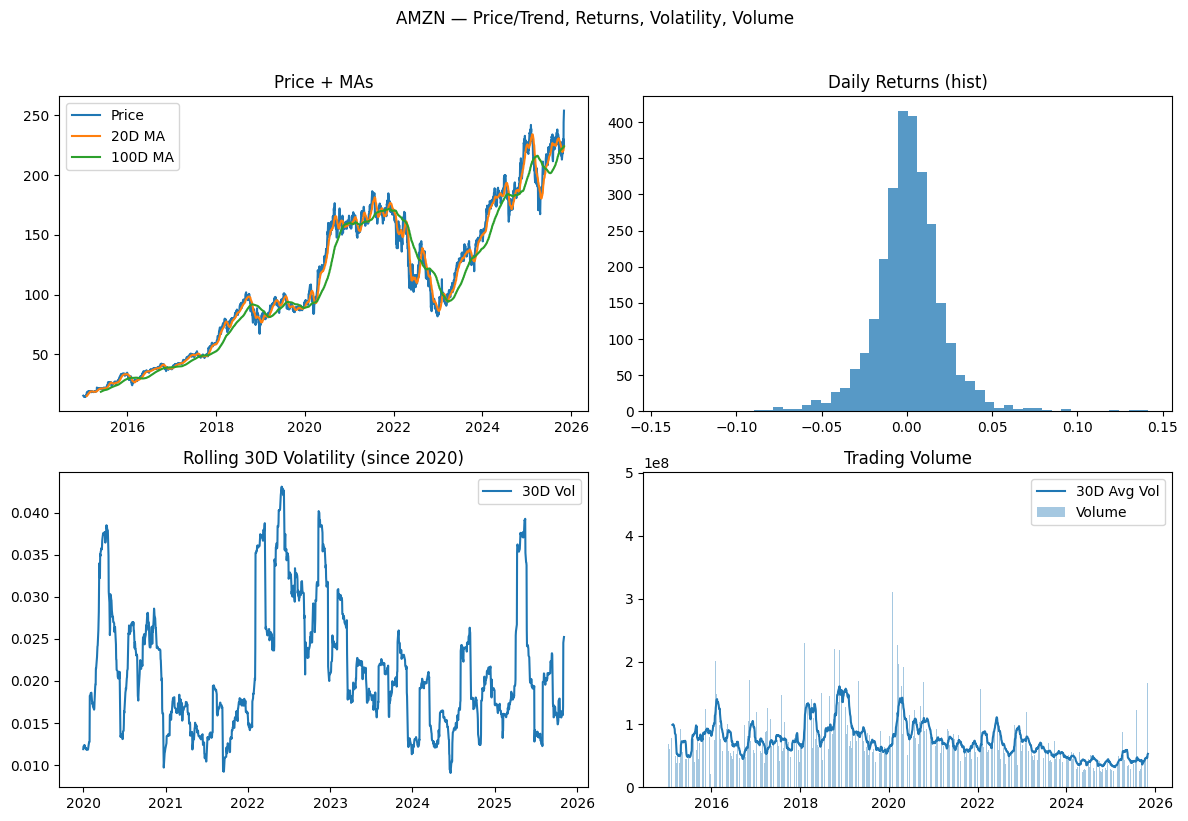

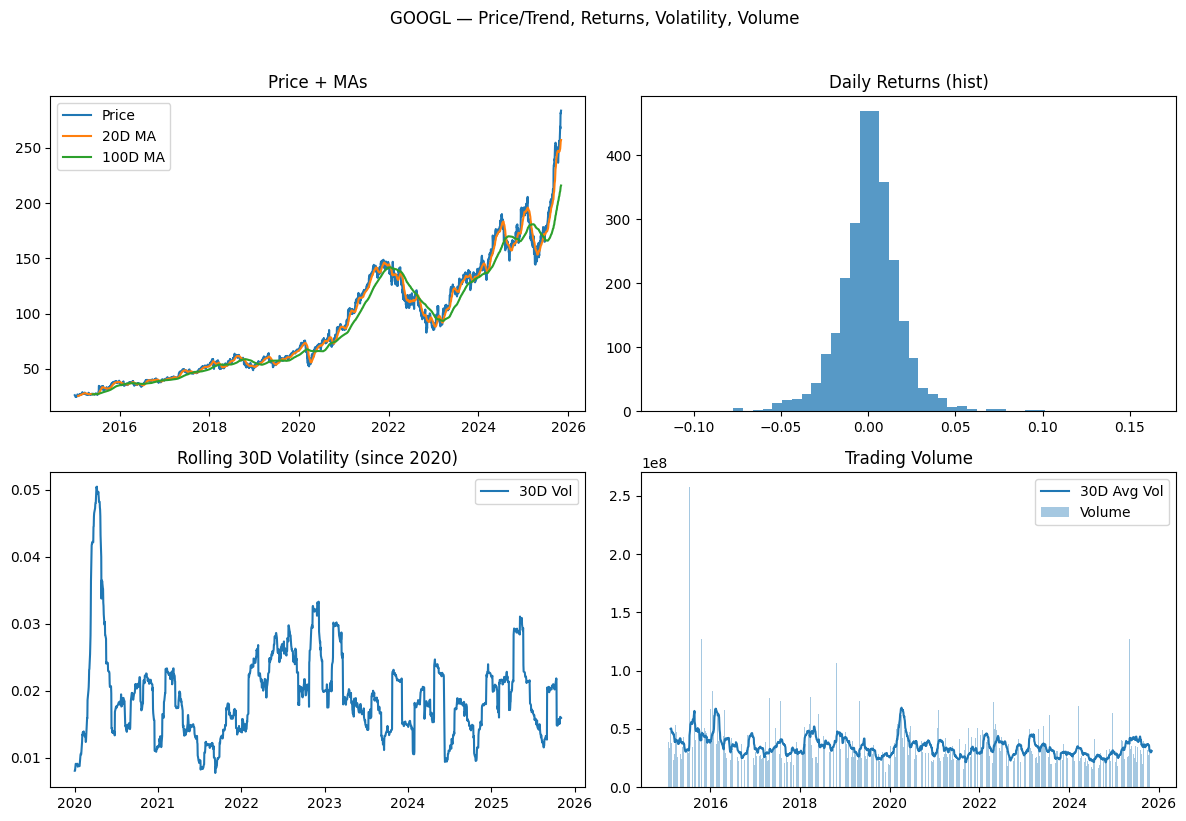

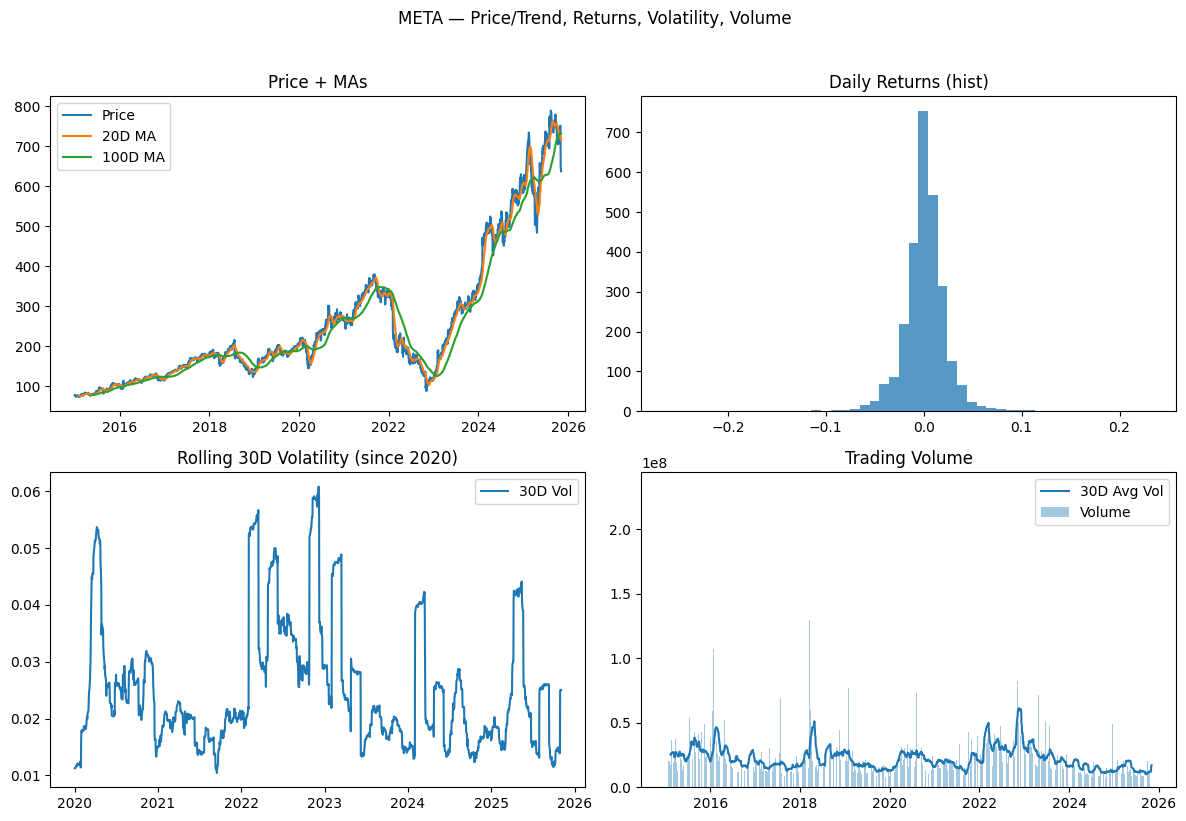

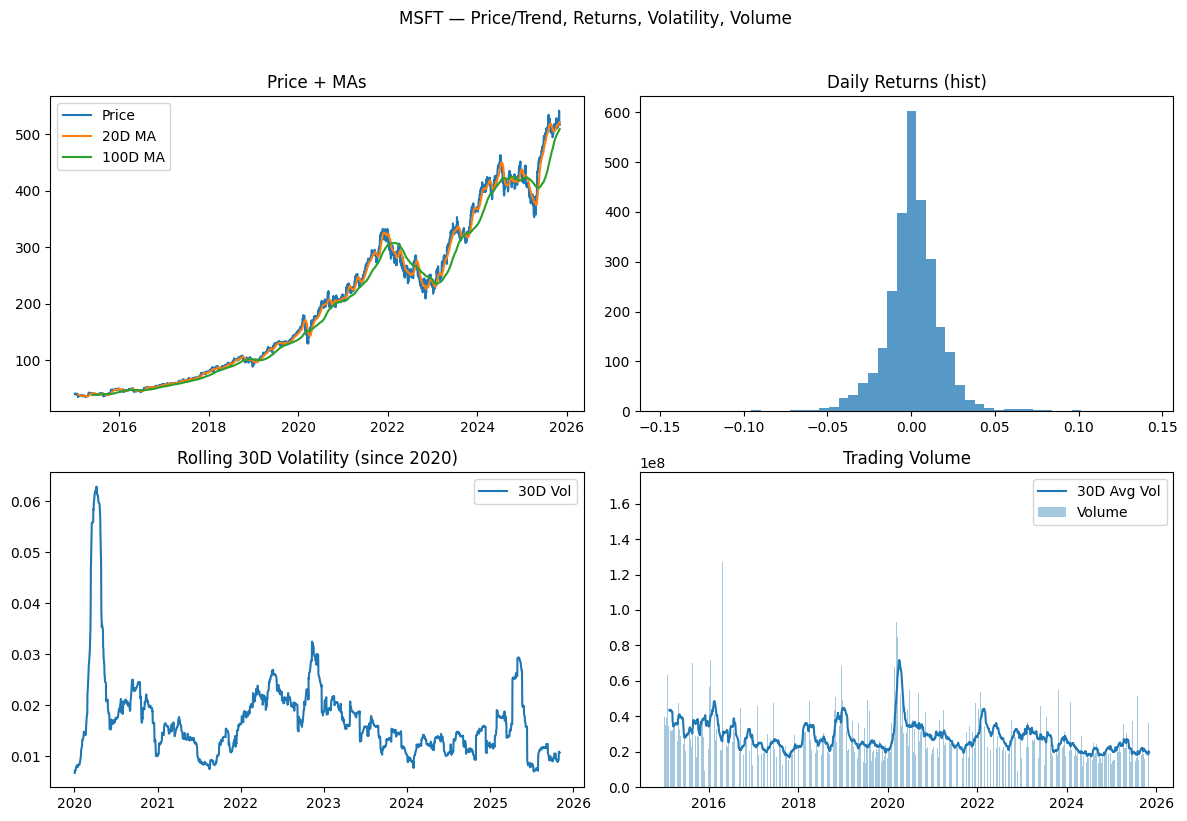

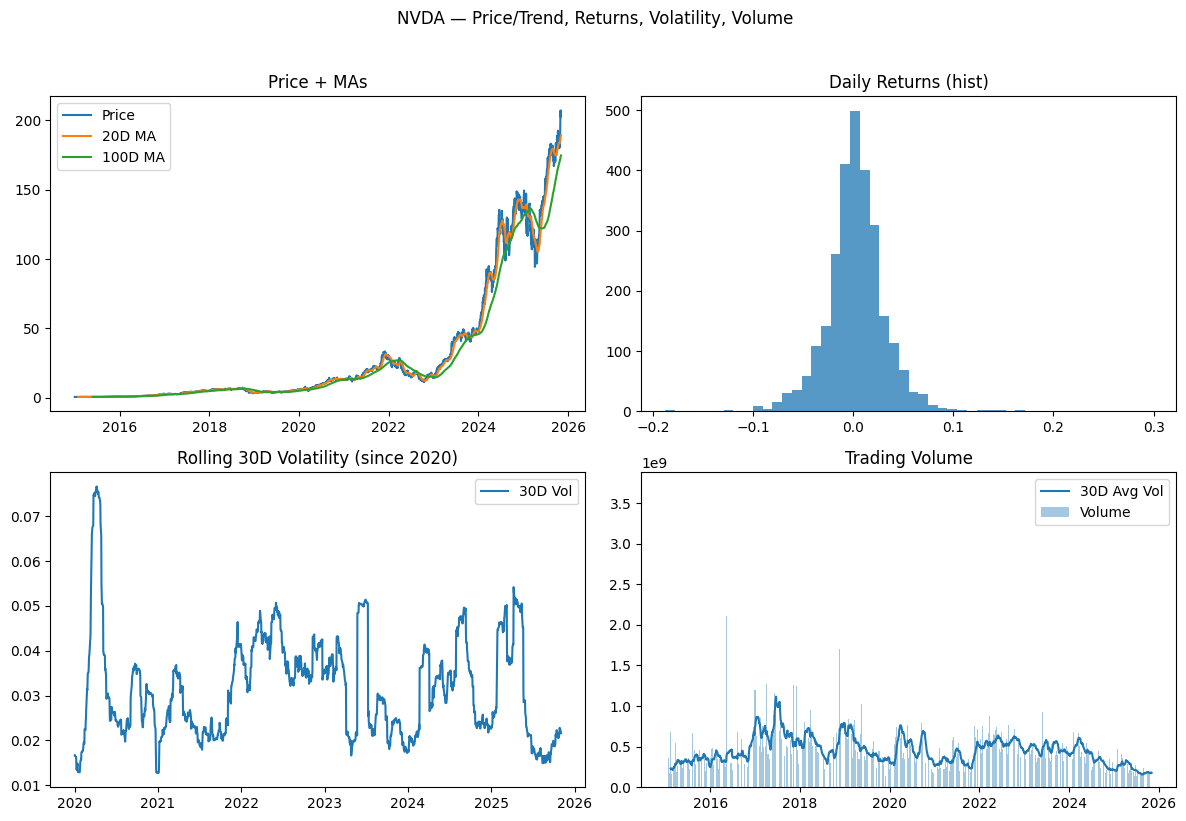

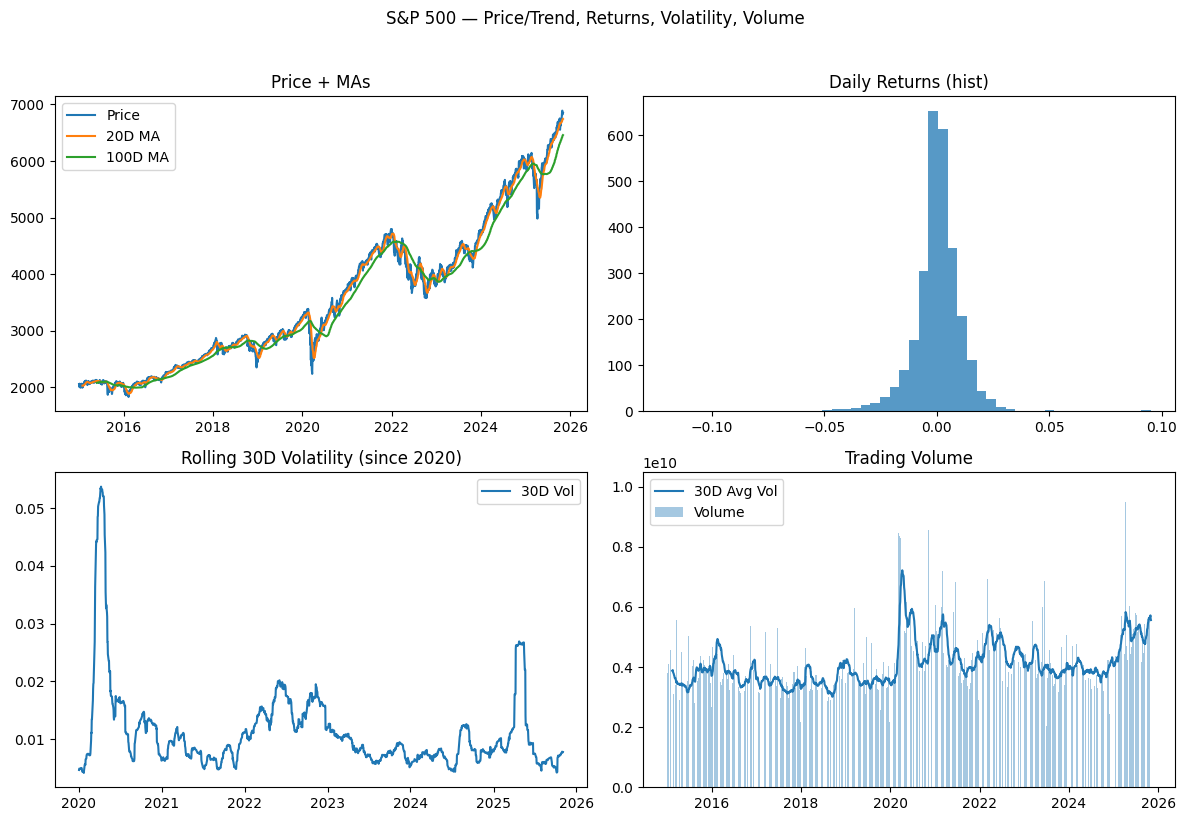

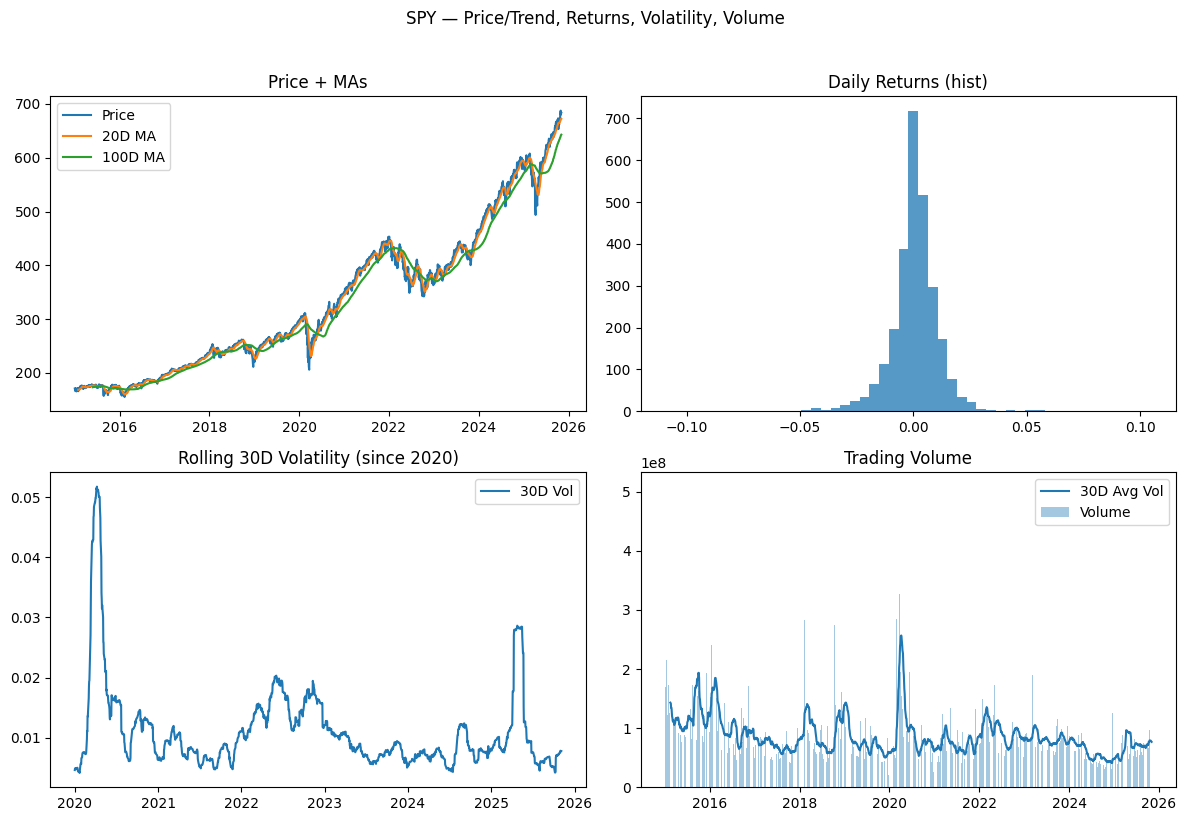

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Prep ---
stacked = stacked.copy()
stacked["Date"] = pd.to_datetime(stacked["Date"])

# find price column
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# daily returns (if not already there)
if "Return" not in stacked.columns:
    stacked = stacked.sort_values(["Ticker","Date"])
    stacked["Return"] = stacked.groupby("Ticker")[price_col].pct_change()

# loop all tickers and plot the 4 mini-charts
for T in sorted(stacked["Ticker"].unique()):
    sub = stacked[stacked["Ticker"] == T].sort_values("Date").copy()
    sub["MA20"]   = sub[price_col].rolling(20).mean()
    sub["MA100"]  = sub[price_col].rolling(100).mean()
    sub["Vol30"]  = sub["Return"].rolling(30).std()
    if "Volume" in sub.columns:
        sub["VolMA30"] = sub["Volume"].rolling(30).mean()
    else:
        sub["VolMA30"] = np.nan

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"{T} — Price/Trend, Returns, Volatility, Volume", y=1.02)

    # Price + moving averages
    ax = axes[0,0]
    ax.plot(sub["Date"], sub[price_col], label="Price")
    ax.plot(sub["Date"], sub["MA20"],  label="20D MA")
    ax.plot(sub["Date"], sub["MA100"], label="100D MA")
    ax.set_title("Price + MAs"); ax.legend()

    # Returns histogram
    ax = axes[0,1]
    ax.hist(sub["Return"].dropna(), bins=50, alpha=0.75)
    ax.set_title("Daily Returns (hist)")

    # Rolling 30D volatility (zoom recent)
    ax = axes[1,0]
    recent = sub[sub["Date"] >= "2020-01-01"]
    ax.plot(recent["Date"], recent["Vol30"], label="30D Vol")
    ax.set_title("Rolling 30D Volatility (since 2020)"); ax.legend()

    # Volume + 30D avg
    ax = axes[1,1]
    if "Volume" in sub.columns:
        ax.bar(sub["Date"], sub["Volume"], alpha=0.4, label="Volume")
        ax.plot(sub["Date"], sub["VolMA30"], label="30D Avg Vol")
        ax.set_title("Trading Volume"); ax.legend()
    else:
        ax.text(0.5, 0.5, "No Volume column", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd


if "df" not in globals():
    # Minimal fallback: build labels from `stacked` if needed
    assert "stacked" in globals(), "Run the cell that builds `stacked` or `df` first."
    df = stacked.copy()
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values(["Ticker","Date"])
    g = df.groupby("Ticker")
    # Targets
    df["y_open_t1"]   = g["Open"].shift(-1)
    df["y_ret_oo_t1"] = (g["Open"].shift(-1) / df["Open"]) - 1

# --- Find the S&P 500 ticker in your data ---
sp_candidates = ["S&P 500", "^GSPC", "SPX", "SP500", "SP-500", "SPY"]  # try index and SPY proxy
tickers = df["Ticker"].astype(str).unique().tolist()

chosen = None
for cand in sp_candidates:
    for t in tickers:
        if t.strip().lower() == cand.strip().lower():
            chosen = t
            break
    if chosen:
        break

if chosen is None:
    raise ValueError(f"Couldn't find an S&P 500 ticker in {tickers}. Try adding '^GSPC' or SPY.")

# Define label columns and optional direction label
label_cols = [c for c in df.columns if c.startswith("y_")]
if "y_ret_oo_t1" in df.columns and "y_dir_t1" not in df.columns:
    df["y_dir_t1"] = (df["y_ret_oo_t1"] > 0).astype(int)  # 1=up, 0=down
    label_cols = label_cols + ["y_dir_t1"]

# Print results
sp_labels = df[df["Ticker"] == chosen][["Date","Ticker"] + label_cols].dropna(subset=label_cols)
print(f"Using ticker: {chosen}")
print("Label columns:", label_cols)
print(sp_labels.tail(10))  # show recent label values

#  class balance for the up/down label
if "y_dir_t1" in sp_labels.columns:
    counts = sp_labels["y_dir_t1"].value_counts().rename(index={0:"down",1:"up"})
    print("Up/Down counts:", dict(counts))

In [ ]:
# Kaggle Data loading and putting in the content folder
!pip -q install kagglehub

import os, shutil, kagglehub

src_path = kagglehub.dataset_download("notlucasp/financial-news-headlines")
print("KaggleHub cached at:", src_path)

dst_dir = "/content/news_data"
shutil.copytree(src_path, dst_dir, dirs_exist_ok=True)


In [ ]:
cnbc = pd.read_csv('news_data/cnbc_headlines.csv')
guardian = pd.read_csv('news_data/guardian_headlines.csv')
reuters = pd.read_csv('news_data/reuters_headlines.csv')

In [ ]:
PATTERNS = {
    "AAPL":  r'(?<![A-Z0-9])\$?AAPL(?![A-Z0-9])|\bApple\b',
    "MSFT":  r'(?<![A-Z0-9])\$?MSFT(?![A-Z0-9])|\bMicrosoft\b',
    "GOOGL": r'(?<![A-Z0-9])\$?(?:GOOGL|GOOG)(?![A-Z0-9])|\b(?:Alphabet|Google)\b',
    "AMZN":  r'(?<![A-Z0-9])\$?AMZN(?![A-Z0-9])|\bAmazon\b',
    # acoid the common meta
    "META":  r'(?<![A-Z0-9])\$?META(?![A-Z0-9])|\bMeta Platforms?\b|\bFacebook\b',
    "NVDA":  r'(?<![A-Z0-9])\$?NVDA(?![A-Z0-9])|\bNVIDIA\b',
    "TSLA":  r'(?<![A-Z0-9])\$?TSLA(?![A-Z0-9])|\bTesla\b',
    "SPY":   r'(?<![A-Z0-9])\$?SPY(?![A-Z0-9])|\bSPDR\s+S&P\s*500\s+ETF(?:\s+Trust)?\b',
    "S&P500": r'(?:\^GSPC)|\bS&P\s*500\b'
}

def one_hot_companies(text_series: pd.Series,
                      patterns: dict = PATTERNS) -> pd.DataFrame:
    """
    input: the series of the text of the news
    out: the one-hot DataFrame of the news
    """
    out = {}
    for tick, pat in patterns.items():
        out[tick] = (
            text_series.str.contains(pat, flags=re.IGNORECASE, regex=True, na=False)
            .astype('int8')
        )
    return pd.DataFrame(out, index=text_series.index)


In [ ]:
import re

cnbc_oh = one_hot_companies(cnbc['Headlines'])
guardian_oh = one_hot_companies(guardian['Headlines'])
reuters_oh = one_hot_companies(reuters['Headlines'])
# cnbc.loc[0]
cnbc = cnbc.join(cnbc_oh)
TICKERS[-1] = 'S&P500'
guardian = guardian.join(guardian_oh)
reuters = reuters.join(reuters_oh)

In [ ]:
cnbc_tickers = cnbc[cnbc[TICKERS].any(axis=1)]
guardian_tickers = guardian[guardian[TICKERS].any(axis=1)]
reuters_tickers = reuters[reuters[TICKERS].any(axis=1)]

#data cleaning for headlines
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_headline(text: str) -> str:
    """Clean and normalize a single news headline."""
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = [w for w in text.split() if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

# Apply cleaning to all three datasets
for df in [cnbc_tickers, guardian_tickers, reuters_tickers]:
    df["Clean_Headlines"] = df["Headlines"].apply(clean_headline)


/tmp/ipython-input-3722125534.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Headlines"] = df["Headlines"].apply(clean_headline)
/tmp/ipython-input-3722125534.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Headlines"] = df["Headlines"].apply(clean_headline)
/tmp/ipython-input-3722125534.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
import re

M = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

PAT1 = re.compile(r'\b([A-Za-z]{3})\s+(\d{1,2})\s+(\d{4})\b')        # Jul 18 2020
PAT2 = re.compile(r'\b(\d{1,2})-([A-Za-z]{3})-(\d{2,4})\b')          # 18-Dec-17/2017
PAT3 = re.compile(r'\b(\d{1,2})\s+([A-Za-z]{3})\s+(\d{4})\b')        # ... Tue, 2 Jan 2018

def norm_y(y): y=int(y); return (2000+y if y<70 else 1900+y) if y<100 else y
def iso(s:str):
    if ',' in s:
      s = s.split(',')[-1]
    if not isinstance(s,str): return None
    for p in (PAT1,PAT2,PAT3):
        m=p.search(s);
        if m:
            a,b,c=m.groups()
            if p is PAT1: mth,day,yr=a,b,c
            elif p is PAT2: day,mth,yr=a,b,c
            else: day,mth,yr=a,b,c
            mnum=M.get(mth.lower(),None)
            if not mnum: return None
            return f"{norm_y(yr):04d}-{mnum:02d}-{int(day):02d}"
    return None

cnbc_tickers['Date']= cnbc_tickers['Time'].map(iso);
guardian_tickers['Date']= guardian_tickers['Time'].map(iso);
reuters_tickers['Date']= reuters_tickers['Time'].map(iso);

/tmp/ipython-input-3034738485.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnbc_tickers['Date']= cnbc_tickers['Time'].map(iso);
/tmp/ipython-input-3034738485.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_tickers['Date']= guardian_tickers['Time'].map(iso);
/tmp/ipython-input-3034738485.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [ ]:
cnbc_tickers

Headlines  \
16    Charts suggest the S&P 500 climb will stall ou...   
32    The S&P 500 'could get ugly' in the near futur...   
59    Charts suggest new highs 'could be on the tabl...   
102   We stand behind our 3400 target for S&P 500 by...   
104   Cramer's lightning round: Microsoft fits the p...   
...                                                 ...   
3047  Cramer: The S&P 500's winners for 2017 could s...   
3049  Cramer: The S&P 500's winners for 2017 could s...   
3066      Cramer Remix: My prediction for Apple in 2018   
3068  Cramer Remix: Apple's stock won't slow down in...   
3071  Cramer's S&P 500 and Dow charts indicate a str...   

                                Time  \
16     7:02  PM ET Tue, 14 July 2020   
32     7:13  PM ET Wed,  1 July 2020   
59     7:47  PM ET Thu, 18 June 2020   
102    3:19  AM ET Thu,  4 June 2020   
104    8:21  PM ET Wed,  3 June 2020   
...                              ...   
3047    7:45  PM ET Fri,  5 Jan 2018   
3049    5:18  PM ET Fri,  5 Jan 2018   
3066    7:35  PM ET Tue,  2 Jan 2018   
3068    7:02  PM ET Tue,  2 Jan 2018   
3071    7:21  PM ET Tue,  2 Jan 2018   

                                            Description  AAPL  MSFT  GOOGL  \
16    The charts, as interpreted by Larry Williams, ...     0     0      0   
32    The S&P 500 could be riding into a "make-or-br...     0     0      0   
59    "If the S&P 500 really does surge to 3,400, up...     0     0      0   
102   Brian Belski of BMO Capital Markets says in ad...     0     0      0   
104   "Mad Money" host Jim Cramer rings the lightnin...     0     1      0   
...                                                 ...   ...   ...    ...   
3047  Jim Cramer reviewed the S&P 500's best perform...     0     0      0   
3049  Jim Cramer reviewed the S&P 500's best perform...     0     0      0   
3066  Jim Cramer dished out his take on whether Appl...     1     0      0   
3068  Jim Cramer dished out his take on whether Appl...     1     0      0   
3071  Jim Cramer warned investors about getting too ...     0     0      0   

      AMZN  META  NVDA  TSLA  SPY  S&P500  \
16       0     0     0     0    0       1   
32       0     0     0     0    0       1   
59       0     0     0     0    0       1   
102      0     0     0     0    0       1   
104      0     0     0     0    0       0   
...    ...   ...   ...   ...  ...     ...   
3047     0     0     0     0    0       1   
3049     0     0     0     0    0       1   
3066     0     0     0     0    0       0   
3068     0     0     0     0    0       0   
3071     0     0     0     0    0       1   

                                        Clean_Headlines        Date  
16    chart suggest sp climb stall end july jim cram...        None  
32       sp could get ugly near future jim cramer warns        None  
59    chart suggest new high could table sp jim cram...        None  
102         stand behind target sp q bmo capital market        None  
104   cramers lightning round microsoft fit pattern ...        None  
...                                                 ...         ...  
3047         cramer sp winner could still room run year  2018-01-05  
3049         cramer sp winner could still room run year  2018-01-05  
3066                      cramer remix prediction apple  2018-01-02  
3068                 cramer remix apple stock wont slow  2018-01-02  
3071         cramers sp dow chart indicate strong start  2018-01-02  

[307 rows x 14 columns]

In [ ]:
guardian_tickers

Time                                          Headlines  AAPL  \
6      18-Jul-20              Can Tesla justify a $300bn valuation?     0   
62     15-Jul-20  Nils Pratley on finance  \n\n\n  Margrethe Ves...     1   
74     15-Jul-20  Apple does not need to pay €13bn Irish tax bil...     1   
237     8-Jul-20  Next, Asos and Amazon drop Boohoo amid Leicest...     0   
280     5-Jul-20  Scammers can create fake business ads on Googl...     0   
...          ...                                                ...   ...   
17614  28-Dec-17  Gambling-style apps offered on Facebook withou...     0   
17647  25-Dec-17  New York's vanishing shops and storefronts: 'I...     0   
17672  22-Dec-17  Facebook signs deal with Universal to give use...     0   
17770  18-Dec-17  Amazon Prime could face investigation over del...     0   
17775  18-Dec-17                  Is Monzo the Facebook of banking?     0   

       MSFT  GOOGL  AMZN  META  NVDA  TSLA  SPY  S&P500  \
6         0      0     0     0     0     1    0       0   
62        0      0     0     0     0     0    0       0   
74        0      0     0     0     0     0    0       0   
237       0      0     1     0     0     0    0       0   
280       0      1     0     0     0     0    0       0   
...     ...    ...   ...   ...   ...   ...  ...     ...   
17614     0      0     0     1     0     0    0       0   
17647     0      0     1     0     0     0    0       0   
17672     0      0     0     1     0     0    0       0   
17770     0      0     1     0     0     0    0       0   
17775     0      0     0     1     0     0    0       0   

                                         Clean_Headlines        Date  
6                             tesla justify bn valuation  2020-07-18  
62     nil pratley finance margrethe vestager correct...  2020-07-15  
74        apple need pay bn irish tax bill eu court rule  2020-07-15  
237    next asos amazon drop boohoo amid leicester fa...  2020-07-08  
280    scammer create fake business ad google within ...  2020-07-05  
...                                                  ...         ...  
17614  gamblingstyle apps offered facebook without ag...  2017-12-28  
17647     new york vanishing shop storefront amazon rent  2017-12-25  
17672  facebook sign deal universal give user access ...  2017-12-22  
17770  amazon prime could face investigation delivery...  2017-12-18  
17775                             monzo facebook banking  2017-12-18  

[475 rows x 13 columns]

In [ ]:
reuters_tickers

Headlines         Time  \
1      Disney cuts ad spending on Facebook amid growi...  Jul 18 2020   
8      Google bans ads on coronavirus conspiracy theo...  Jul 17 2020   
11     S&P 500 ends higher as traders weigh stimulus ...  Jul 17 2020   
12     FTC considering deposing top Facebook executiv...  Jul 17 2020   
57     Microsoft trims jobs as it enters new fiscal year  Jul 16 2020   
...                                                  ...          ...   
32756  Privacy issues emerge as major business risk f...  Mar 20 2018   
32757  Google launches news initiative to combat fake...  Mar 20 2018   
32758  UK investigates Facebook over data breach, to ...  Mar 20 2018   
32759  Facebook's lead EU regulator 'following up' on...  Mar 20 2018   
32763  White House welcomes looks into reports Trump'...  Mar 20 2018   

                                             Description  AAPL  MSFT  GOOGL  \
1      Walt Disney  has become the latest company to ...     0     0      0   
8      Alphabet Inc's Google said on Friday it would ...     0     0      1   
11     The S&P 500 ended higher on Friday as investor...     0     0      0   
12     The U.S. Federal Trade Commission is consideri...     0     0      0   
57     Microsoft Corp said on Thursday it had trimmed...     0     1      0   
...                                                  ...   ...   ...    ...   
32756  Facebook faces substantial business risks from...     0     0      0   
32757  Alphabet Inc's  Google is launching the Google...     0     0      1   
32758  Britain is investigating whether Facebook did ...     0     0      0   
32759  Facebook's lead regulator in the European Unio...     0     0      0   
32763  President Donald Trump wants Americans' privac...     0     0      0   

       AMZN  META  NVDA  TSLA  SPY  S&P500  \
1         0     1     0     0    0       0   
8         0     0     0     0    0       0   
11        0     0     0     0    0       1   
12        0     1     0     0    0       0   
57        0     0     0     0    0       0   
...     ...   ...   ...   ...  ...     ...   
32756     0     1     0     0    0       0   
32757     0     0     0     0    0       0   
32758     0     1     0     0    0       0   
32759     0     1     0     0    0       0   
32763     0     1     0     0    0       0   

                                         Clean_Headlines        Date  
1      disney cut ad spending facebook amid growing b...  2020-07-18  
8      google ban ad coronavirus conspiracy theory co...  2020-07-17  
11       sp end higher trader weigh stimulus virus worry  2020-07-17  
12     ftc considering deposing top facebook executiv...  2020-07-17  
57             microsoft trim job enters new fiscal year  2020-07-16  
...                                                  ...         ...  
32756  privacy issue emerge major business risk facebook  2018-03-20  
32757     google launch news initiative combat fake news  2018-03-20  
32758  uk investigates facebook data breach raid camb...  2018-03-20  
32759  facebooks lead eu regulator following third pa...  2018-03-20  
32763  white house welcome look report trump consulta...  2018-03-20  

[2723 rows x 14 columns]

In [ ]:
# Baseline Logistic Regrassion Model - J

# --- Combine all headline datasets into one ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.sparse import hstack
import numpy as np

# Combine all cleaned news datasets
TICKERS = ["AAPL","MSFT","GOOGL","AMZN","META","NVDA","TSLA","SPY"]
news_combined = pd.concat(
    [cnbc_tickers[['Date', 'Clean_Headlines'] + TICKERS],
     guardian_tickers[['Date', 'Clean_Headlines'] + TICKERS],
     reuters_tickers[['Date', 'Clean_Headlines'] + TICKERS]],
    ignore_index=True
)

# Melt one-hot tickers → long format (Date, Ticker, Headline)
news_long = news_combined.melt(
    id_vars=['Date', 'Clean_Headlines'],
    value_vars=TICKERS,
    var_name='Ticker',
    value_name='Mention'
)
news_long = news_long[news_long['Mention'] == 1].drop(columns='Mention')

# Align finance data with news data
stacked['Date'] = pd.to_datetime(stacked['Date'])
news_long['Date'] = pd.to_datetime(news_long['Date'])

merged = pd.merge(
    stacked,
    news_long,
    on=['Date','Ticker'],
    how='inner'  # keep only aligned dates
)

# Create next-day target: 1 if next-day open > current close
merged = merged.sort_values(['Ticker','Date'])
merged['Next_Open'] = merged.groupby('Ticker')['Open'].shift(-1)
merged['Direction'] = (merged['Next_Open'] > merged['Close']).astype(int)

# Drop rows missing target or text
df = merged.dropna(subset=['Clean_Headlines','Direction']).copy()

# Select numerical features
num_features = ['Close','Open','High','Low','Volume','Return']
for col in num_features:
    if col not in df.columns:
        df[col] = np.nan
df[num_features] = df[num_features].fillna(method='ffill')

# Train/test split
X_text = df['Clean_Headlines']
X_num = df[num_features]
y = df['Direction']

X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_text, X_num, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF for text
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# Combine numeric + text features
X_train_combined = hstack([X_train_tfidf, X_train_scaled])
X_test_combined = hstack([X_test_tfidf, X_test_scaled])

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1)
model.fit(X_train_combined, y_train)

# Evaluate
y_pred = model.predict(X_test_combined)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

/tmp/ipython-input-1392805867.py:55: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[num_features] = df[num_features].fillna(method='ffill')



Accuracy: 0.573

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.56      0.55       287
           1       0.61      0.58      0.60       341

    accuracy                           0.57       628
   macro avg       0.57      0.57      0.57       628
weighted avg       0.58      0.57      0.57       628


Confusion Matrix:
 [[162 125]
 [143 198]]


In [ ]:
# Random Forest baseline model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.sparse import hstack
import numpy as np

# Combine TF-IDF text features and numeric features
X_train_combined = hstack([X_train_tfidf, X_train_scaled])
X_test_combined = hstack([X_test_tfidf, X_test_scaled])

# Initialize the Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,       # number of trees
    max_depth=None,         # let trees expand fully
    random_state=42,
    n_jobs=-1,              # use all CPU cores
    class_weight='balanced' # handle up/down imbalance
)

# Train
rf_model.fit(X_train_combined, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_combined)

# Evaluate
acc_rf = round(accuracy_score(y_test, y_pred_rf), 3)
print("Random Forest Accuracy:", acc_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

importances = rf_model.feature_importances_
feature_names = list(tfidf.get_feature_names_out()) + list(num_features)
indices = np.argsort(importances)[::-1][:20]

print("\nTop 20 Important Features:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

Random Forest Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0      0.570     0.512     0.539       287
           1      0.622     0.674     0.647       341

    accuracy                          0.600       628
   macro avg      0.596     0.593     0.593       628
weighted avg      0.598     0.600     0.598       628


Confusion Matrix:
 [[147 140]
 [111 230]]

Top 20 Important Features:
Return: 0.0674
Volume: 0.0238
Close: 0.0233
High: 0.0223
Open: 0.0218
Low: 0.0217
tesla: 0.0108
amazon: 0.0082
facebook: 0.0074
apple: 0.0071
say: 0.0064
google: 0.0053
new: 0.0050
service: 0.0039
china: 0.0034
share: 0.0034
plan: 0.0033
coronavirus: 0.0032
billion: 0.0031
india: 0.0031


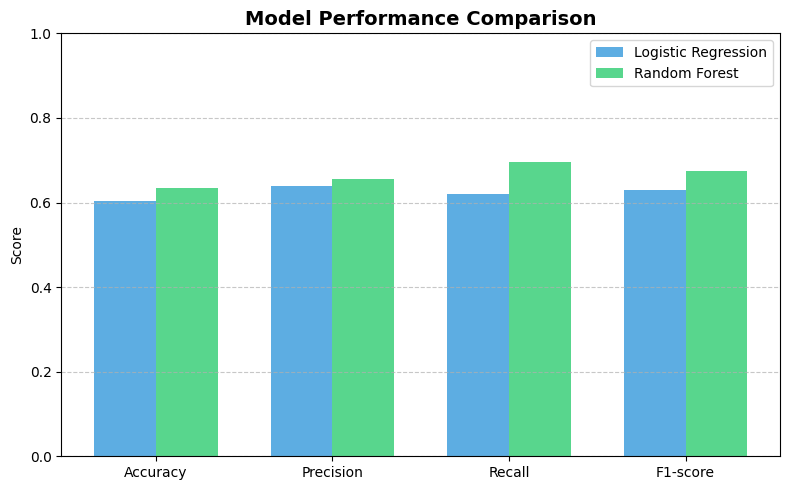

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics from the models
log_reg_results = {
    "Accuracy": 0.604,
    "Precision": 0.64,
    "Recall": 0.62,
    "F1-score": 0.63
}

rf_results = {
    "Accuracy": 0.635,
    "Precision": 0.655,
    "Recall": 0.695,
    "F1-score": 0.674
}

# Prepare data for plotting
metrics = list(log_reg_results.keys())
log_reg_values = list(log_reg_results.values())
rf_values = list(rf_results.values())

x = np.arange(len(metrics))
width = 0.35

# Bar chart comparison
plt.figure(figsize=(8,5))
plt.bar(x - width/2, log_reg_values, width, label='Logistic Regression', color='#5DADE2')
plt.bar(x + width/2, rf_values, width, label='Random Forest', color='#58D68D')

plt.title("Model Performance Comparison", fontsize=14, weight='bold')
plt.ylabel("Score")
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
